<a href="https://colab.research.google.com/github/LednevaAR/FPGA/blob/main/homework2/Report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JK Flip Flop
Код jk_flip_flop.v:
```
module jk_flip_flop ( input j, // Input J
					input k, // Input K
					input rstn, // Active-low async reset
					input clk, // Input clk
					output reg q); // Output Q
	always @ (posedge clk or negedge rstn) begin
		if (!rstn) begin
			q <= 0;
		end else begin
			q <= (j & ~q) | (~k & q);
		end
	end
endmodule
```
Код testbench jk_flip_flop_tb.v:
```
`timescale 1ns / 1ns
module tb;
	reg j, k, rstn, clk;
	wire q;
	integer i;
	reg [2:0] dly;
	always #10 clk = ~clk;
	jk_flip_flop u0 (.j(j), .k(k), .clk(clk), .rstn(rstn), .q(q));
	initial begin
		{j, k, rstn, clk} <= 0;
		#10 rstn <= 1;
		for (i = 0; i < 10; i = i+1) begin
			dly = $random;
			#(dly) j <= $random;
			#(dly) k <= $random;
		end
		#20 $finish;
	end
endmodule
```
Схема:



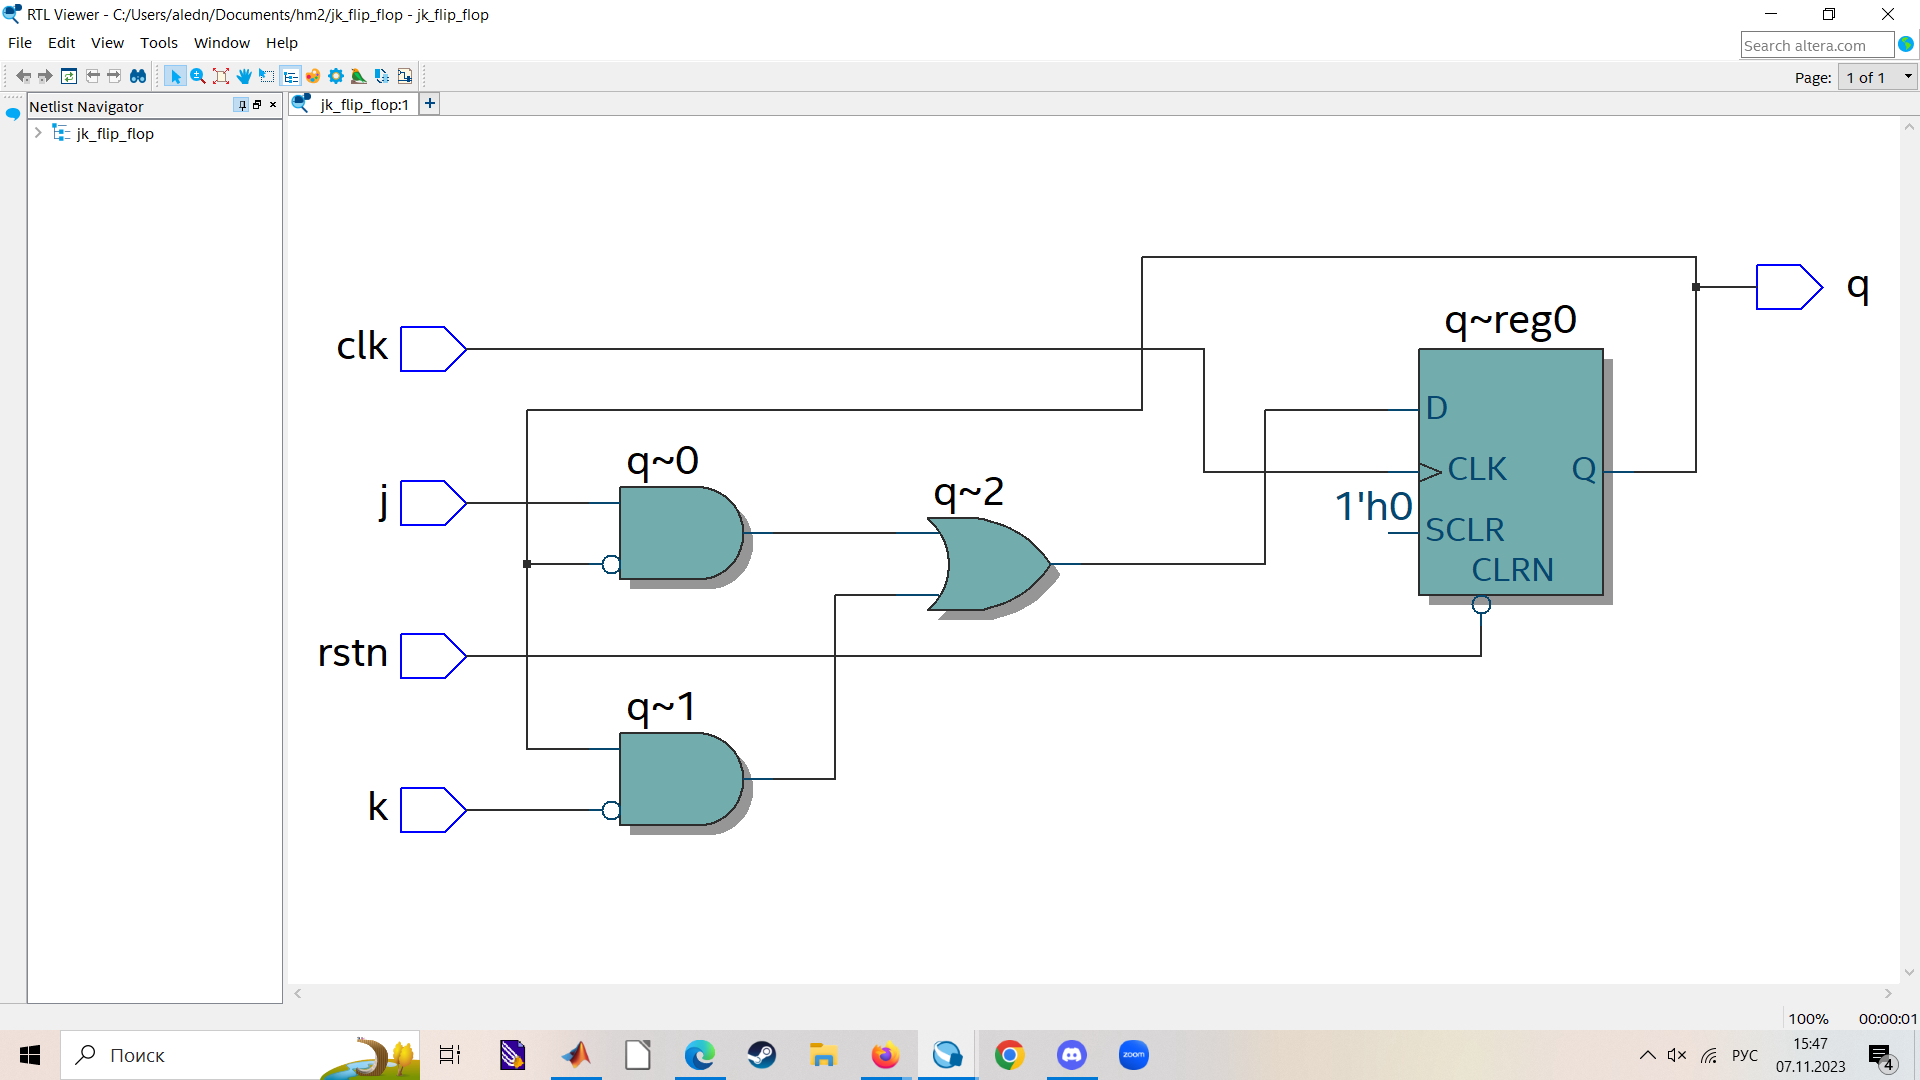

Результаты симуляции:

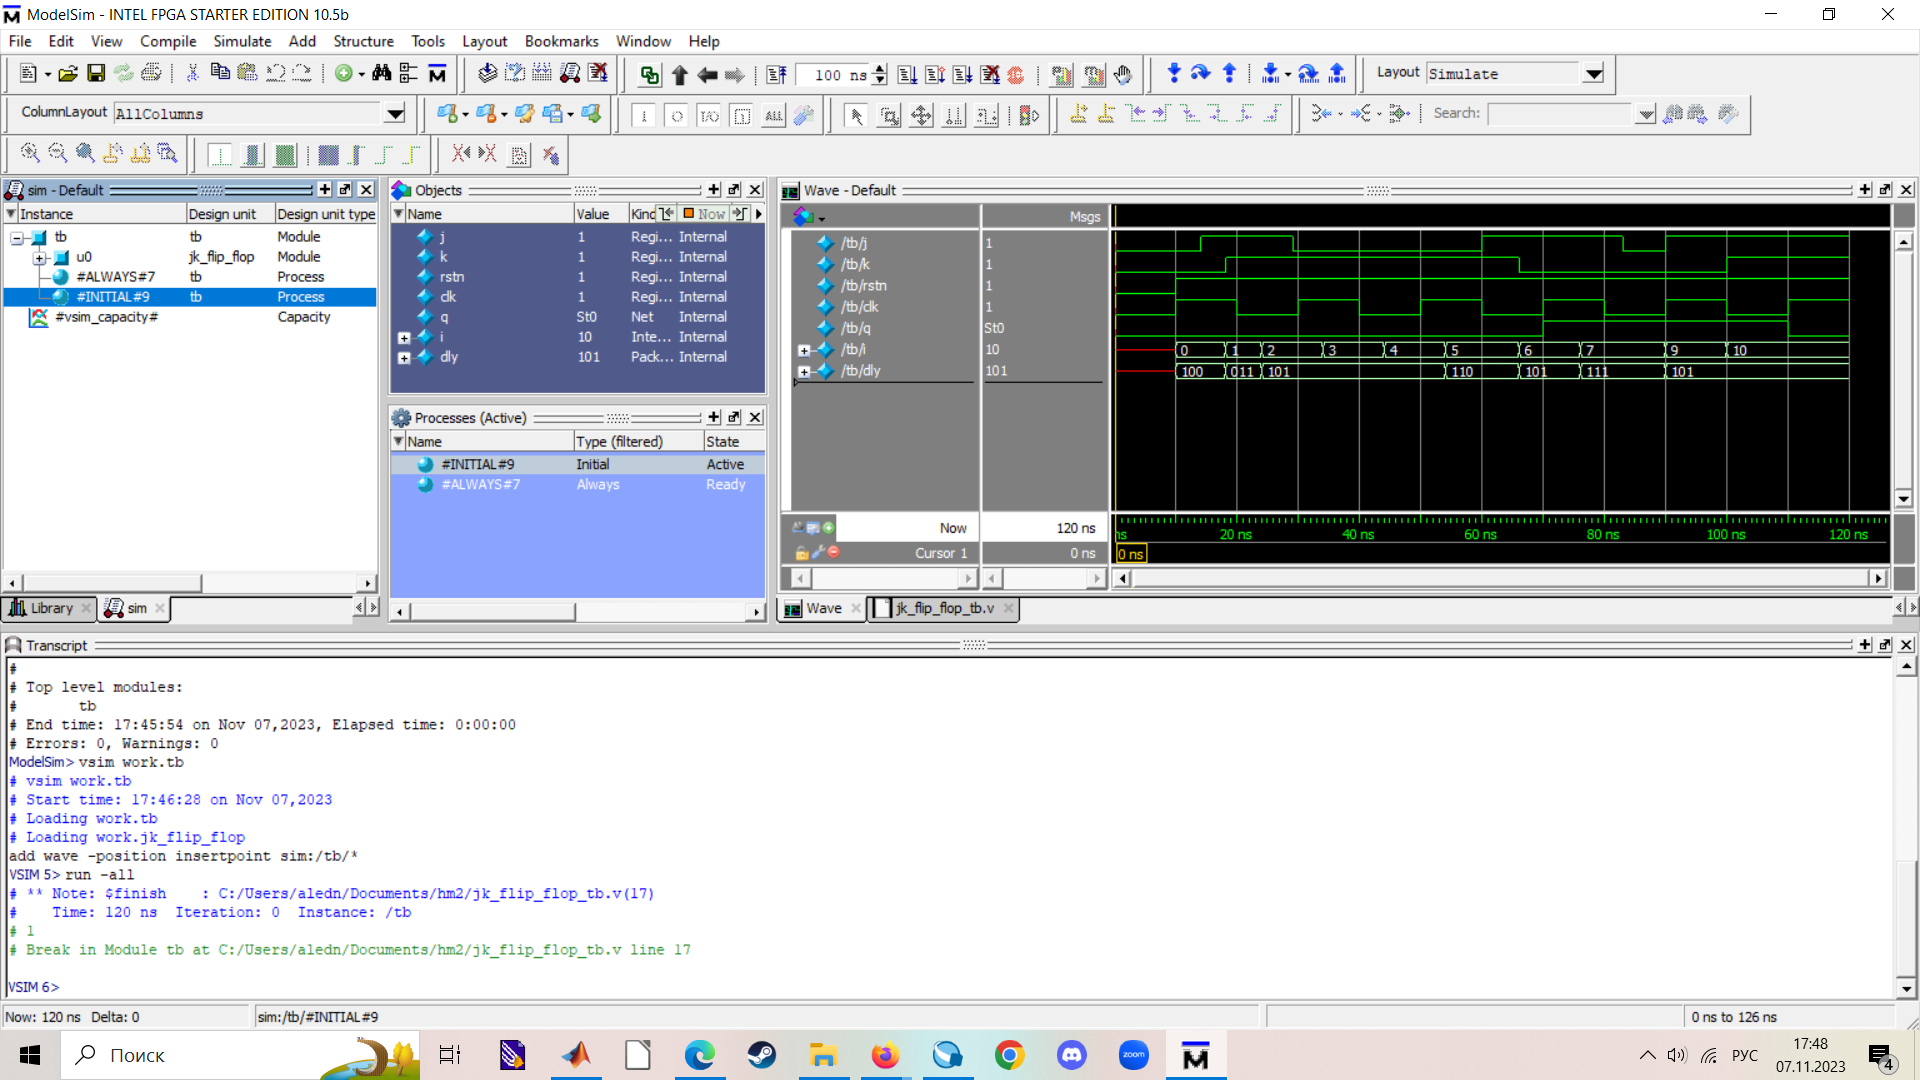

# Modulo-10 counter
Код mod10_count.v:
```
module mod10_count ( input clk,
							input rstn,
							output reg[3:0] out);

	always @ (posedge clk) begin
		if (!rstn) begin
			out <= 0;
		end else begin
			if (out == 10)
				out <= 0;
			else
				out <= out + 1;
		end
	end
endmodule
```
Код testbench mod10_count_tb.v:
```
`timescale 1ns / 1ns
module tb;
	reg clk, rstn;
	wire [3:0] out;
	mod10_count u0 ( .clk(clk), .rstn(rstn), .out(out));
	always #10 clk = ~clk;
	initial begin
		{clk, rstn} <= 0;
		#10 rstn <= 1;
		#450 $finish;
	end
endmodule
```
Схема:

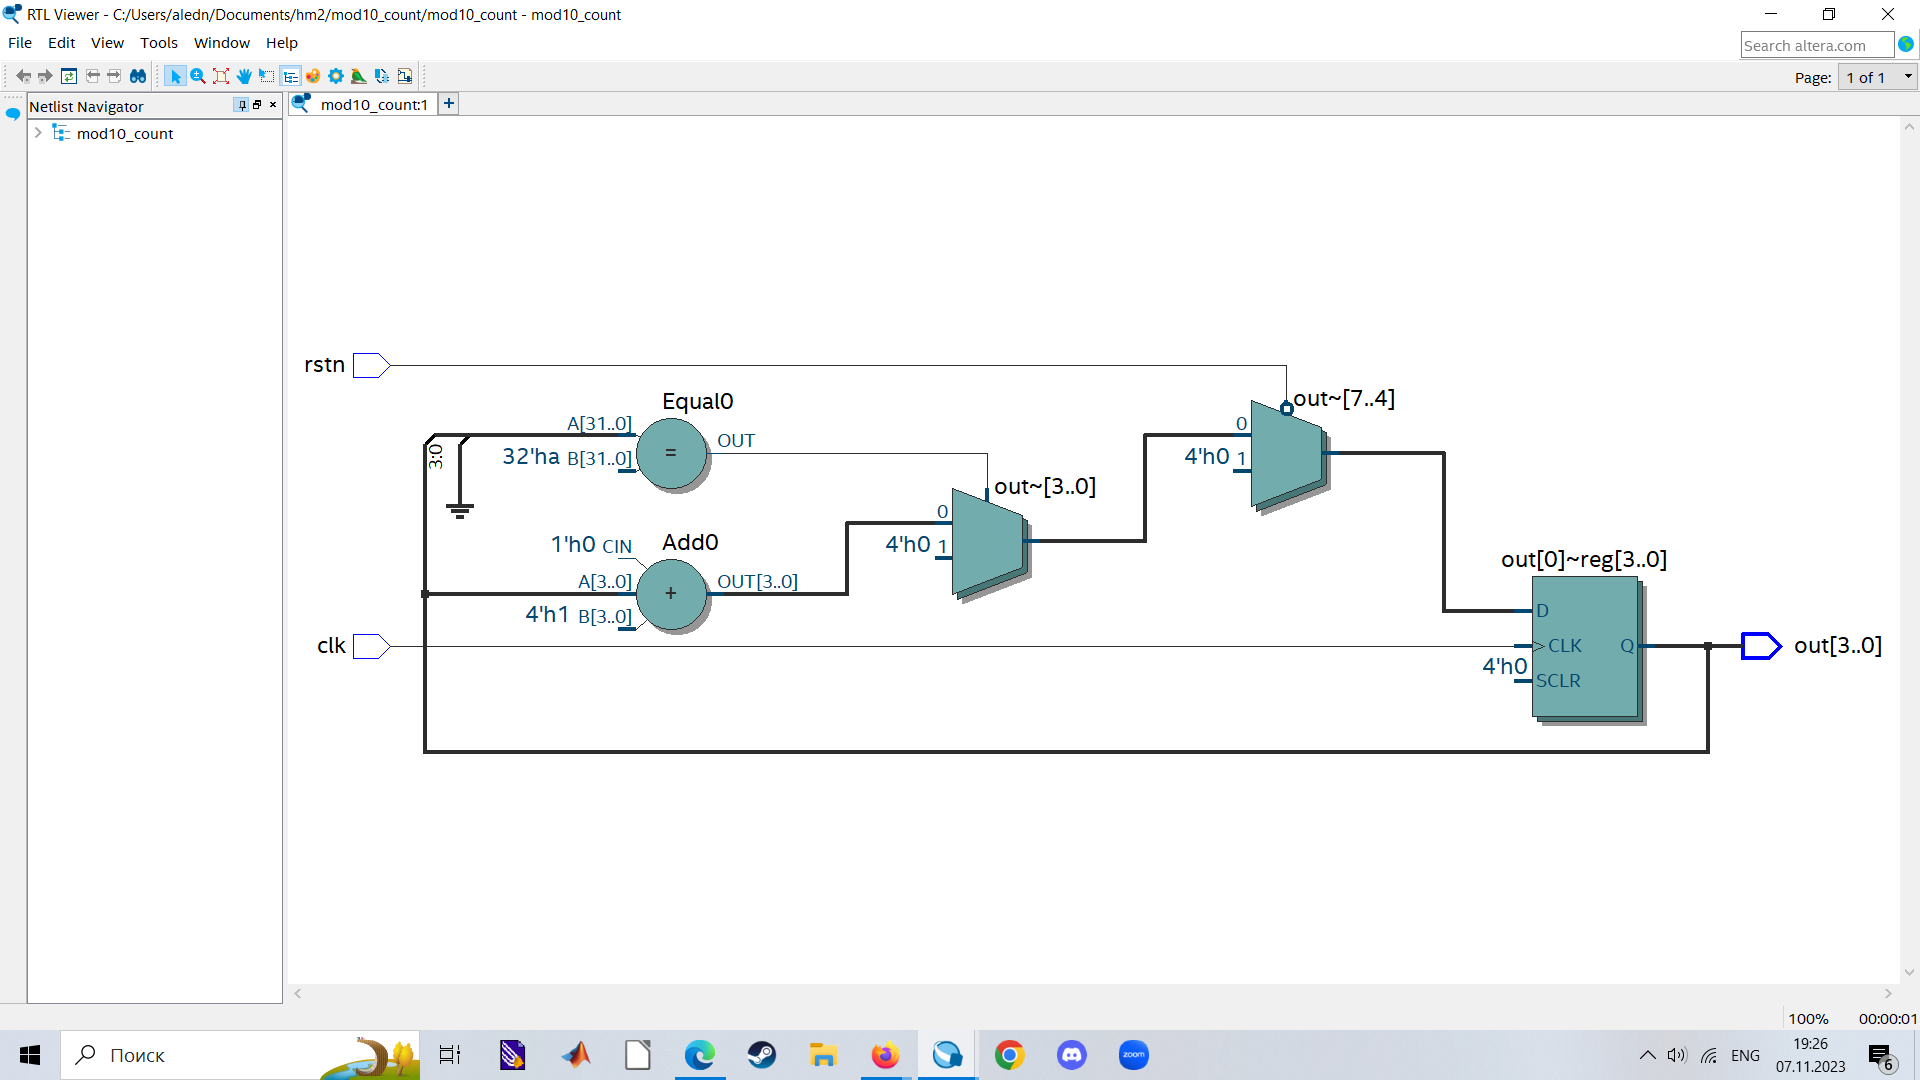

Результаты симуляции:

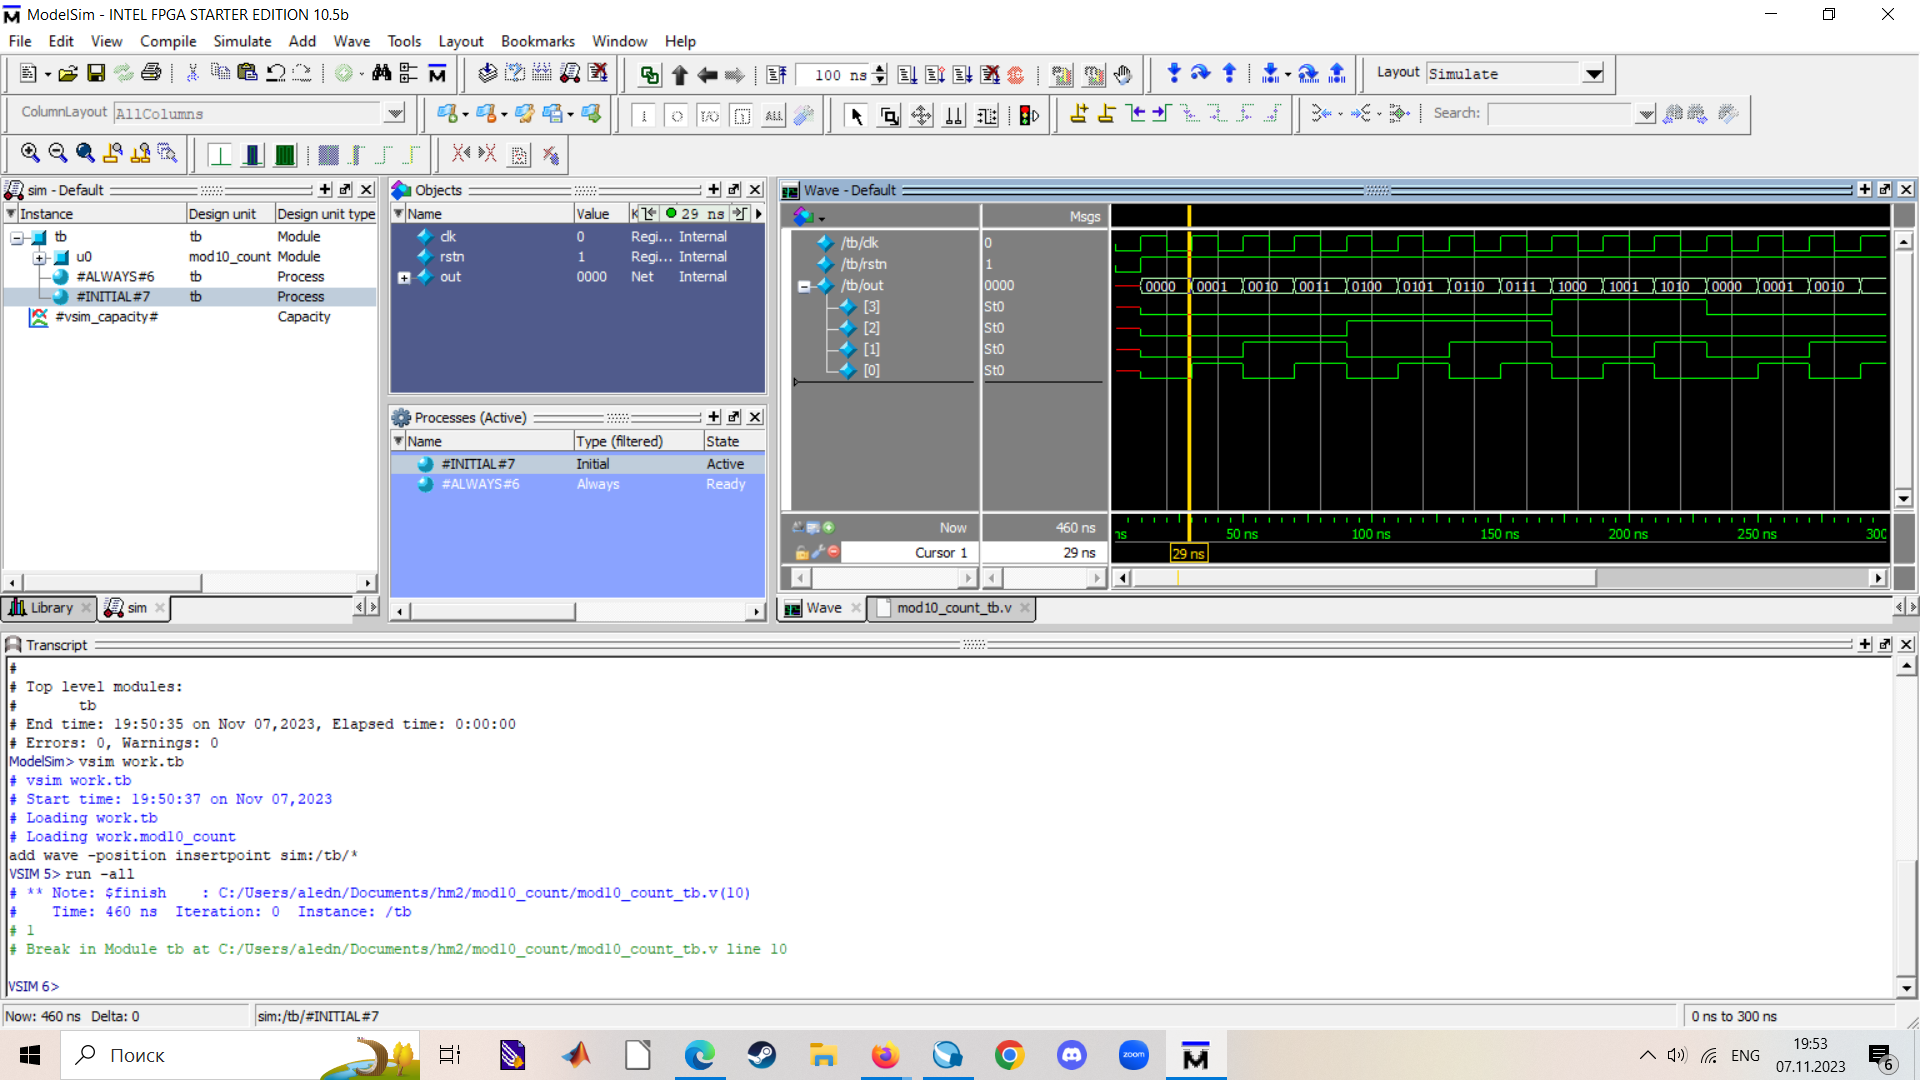

P.S. Изначально в коде testbench на сайте было "reg [3:0] out;". Однако, в таком случае ModelSim выдавал ошибку: Illegal output or inout port connection for port 'out'. Поэтому эта строчка была заменена на "wire [3:0] out;", и ошибка исчезла.

# 4bit Left Shift Register
Код lshift_4b_reg.v:
```
module lshift_4b_reg(input d,
							input clk,
							input rstn,
							output reg [3:0] out);
	always @ (posedge clk) begin
		if (!rstn) begin
			out <= 0;
		end else begin
			out <= {out[2:0], d};
		end
	end
endmodule
```
Код testbench lshift_4b_reg_tb.v:
```
`timescale 1ns / 1ns
module tb;
	reg clk, rstn, d;
	wire [3:0] out;
	integer i;
	lshift_4b_reg u0 ( .d(d), .clk(clk), .rstn(rstn), .out(out));
	always #10 clk = ~clk;
	initial begin
		{clk, rstn, d} <= 0;
		#10 rstn <= 1;
		for (i = 0; i < 20; i=i+1) begin
			@(posedge clk) d <= $random;
		end
		#10 $finish;
	end
endmodule
```
Схема:

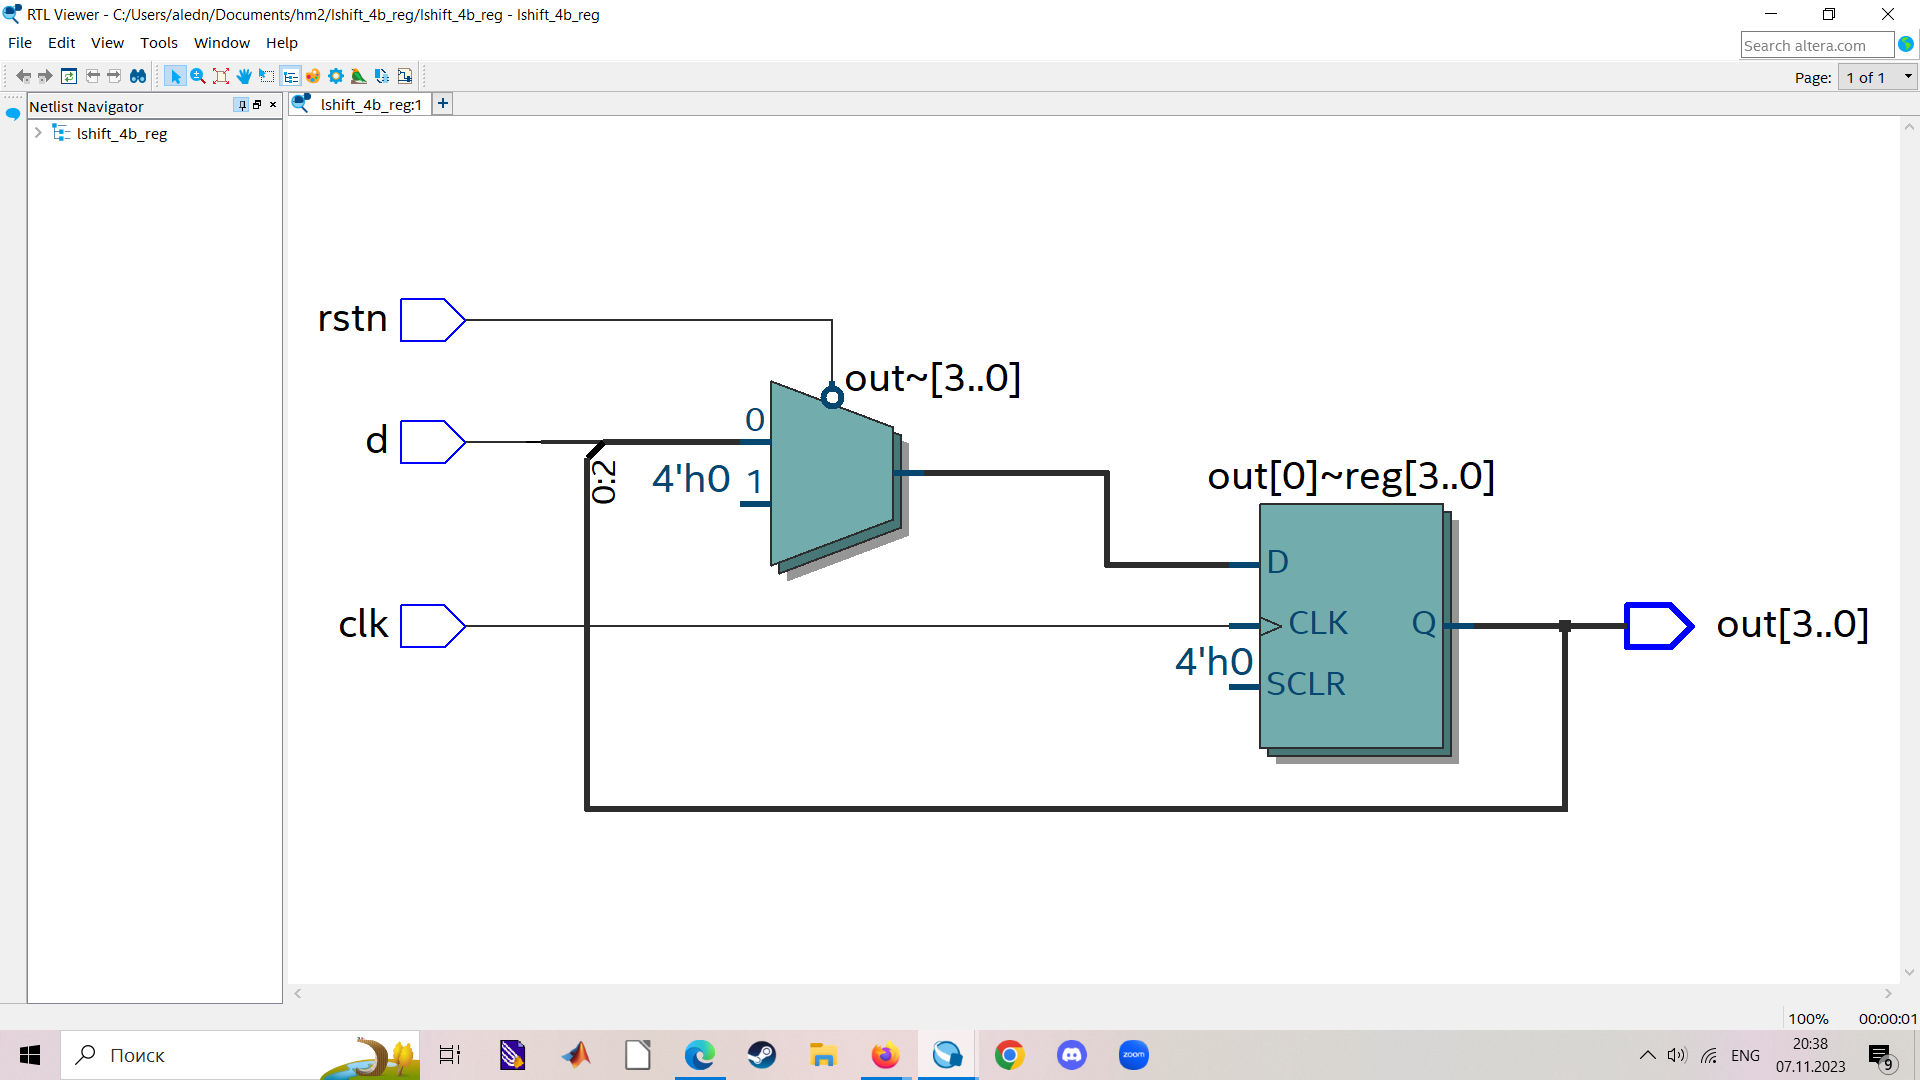

Результаты симуляции:

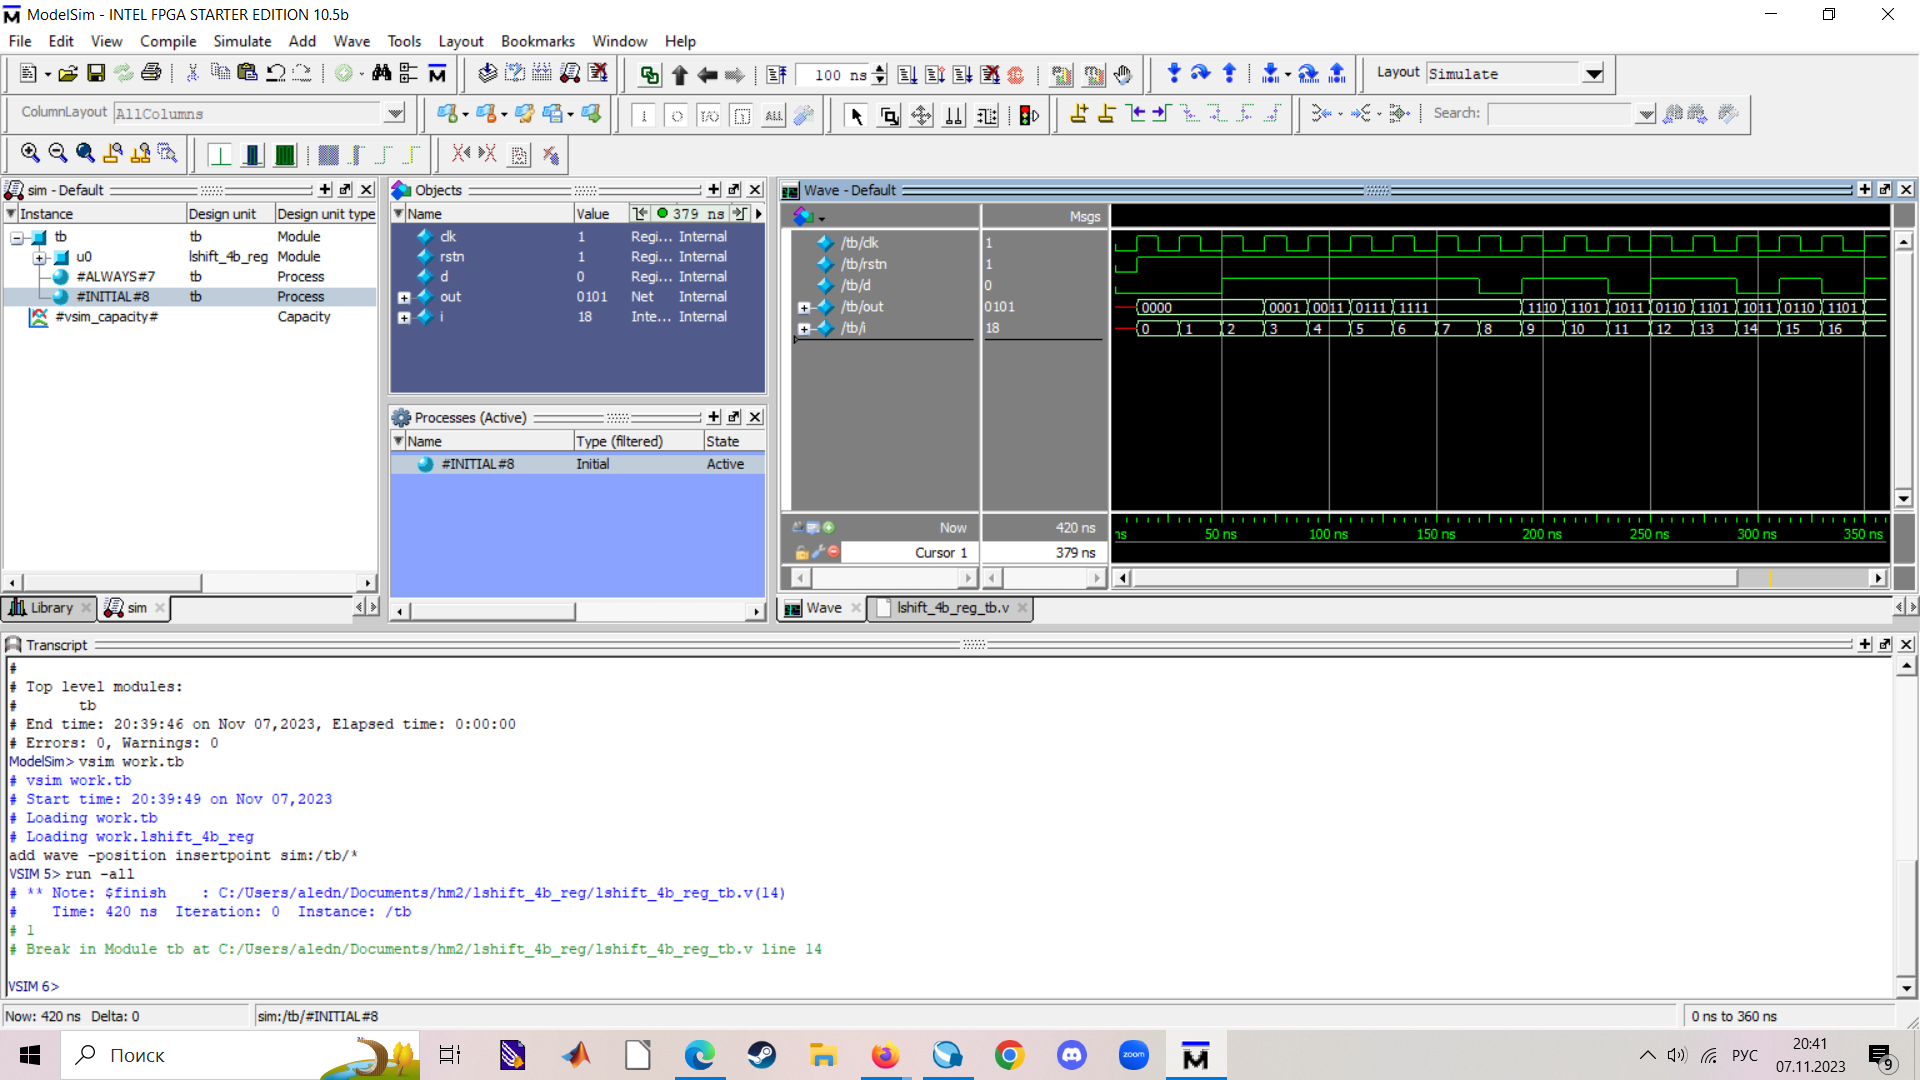

#  Simple combinational logic
Код combo.v:

```
module combo ( input a, b, c, d, e, output reg z);
	always @ ( a or b or c or d or e) begin
		z = ((a & b) | (c ^ d) & ~e);
	end
endmodule
```
Код testbench combo_tb.v:

```
module tb;
	reg a, b, c, d, e;
	wire z;
	integer i;
	combo u0 ( .a(a), .b(b), .c(c), .d(d), .e(e), .z(z));
	initial begin
		a <= 0;
		b <= 0;
		c <= 0;
		d <= 0;
		e <= 0;
		$monitor ("a=%0b b=%0b c=%0b d=%0b e=%0b z=%0b", a, b, c, d, e, z);
		for (i = 0; i < 32; i = i + 1) begin
			{a, b, c, d, e} = i;
		  #10;
	  end
end
endmodule
```
Схема:



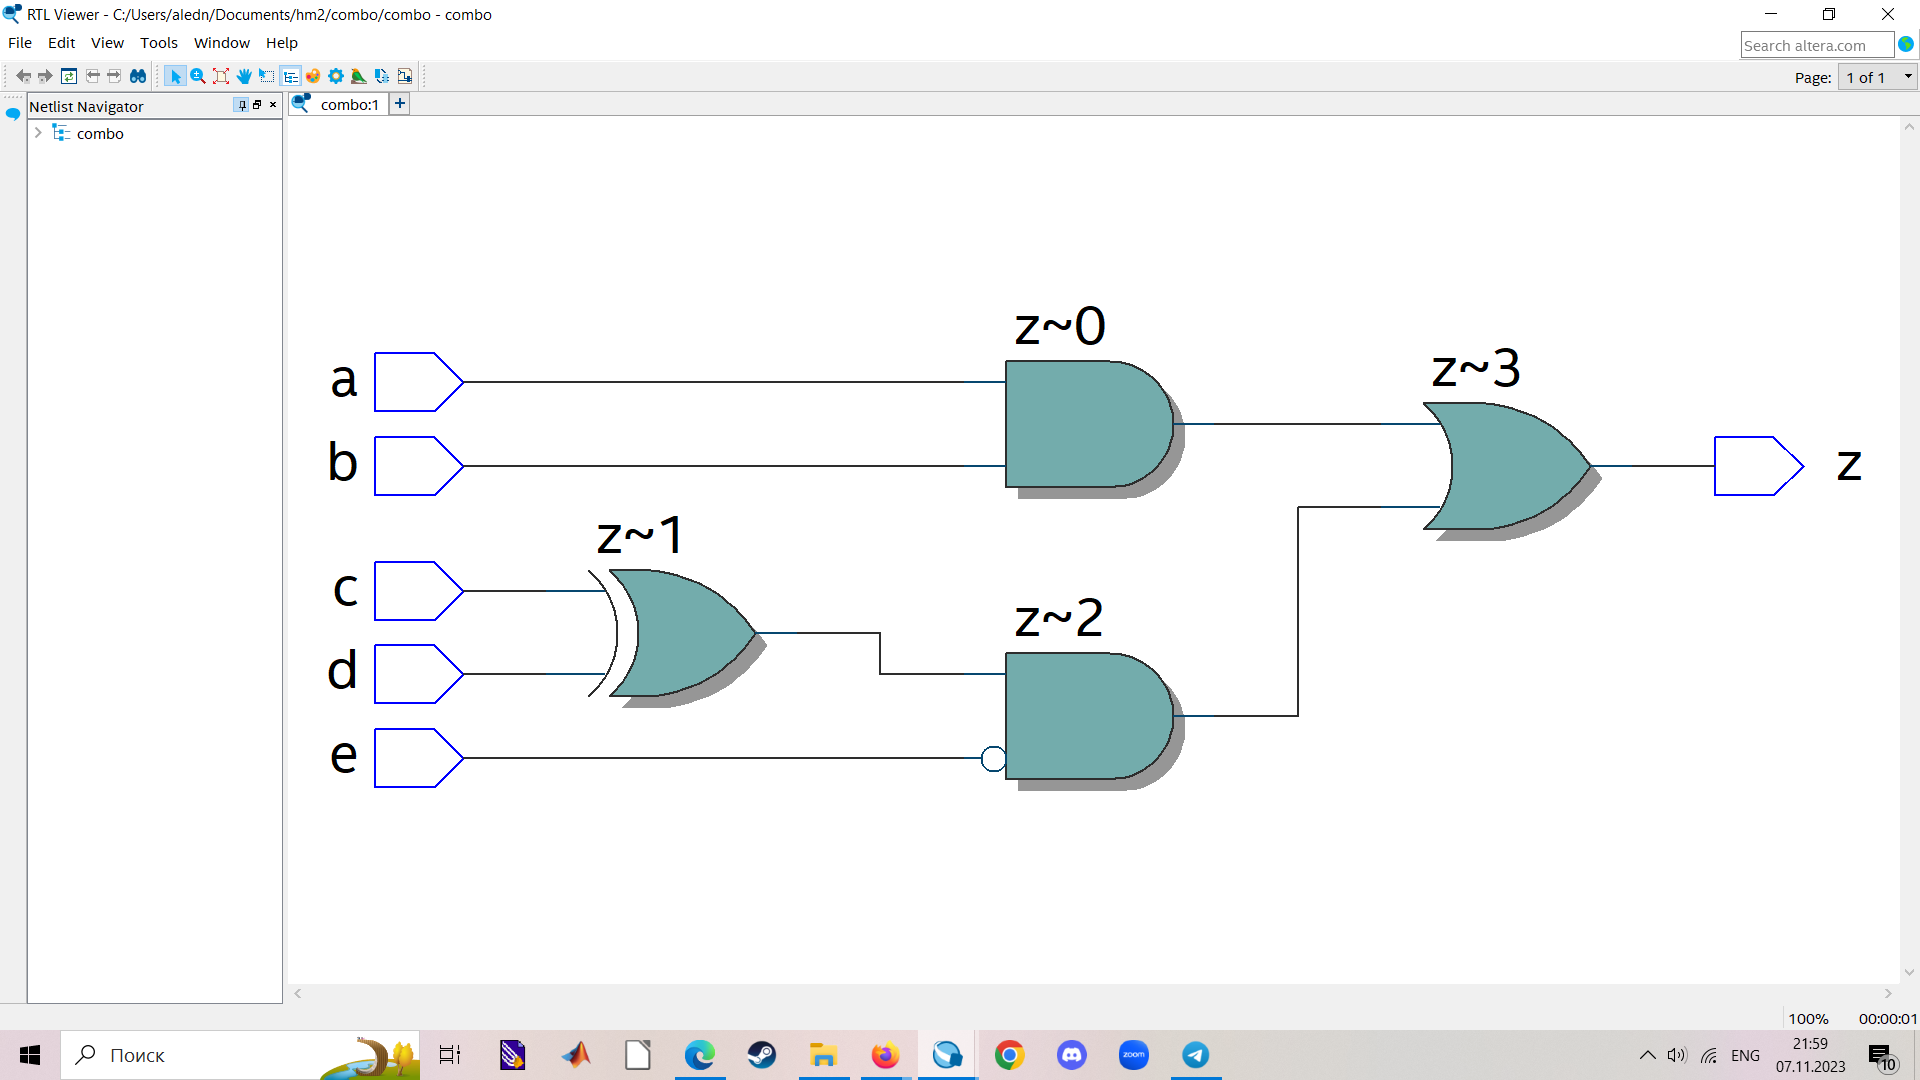

Результаты симуляции:

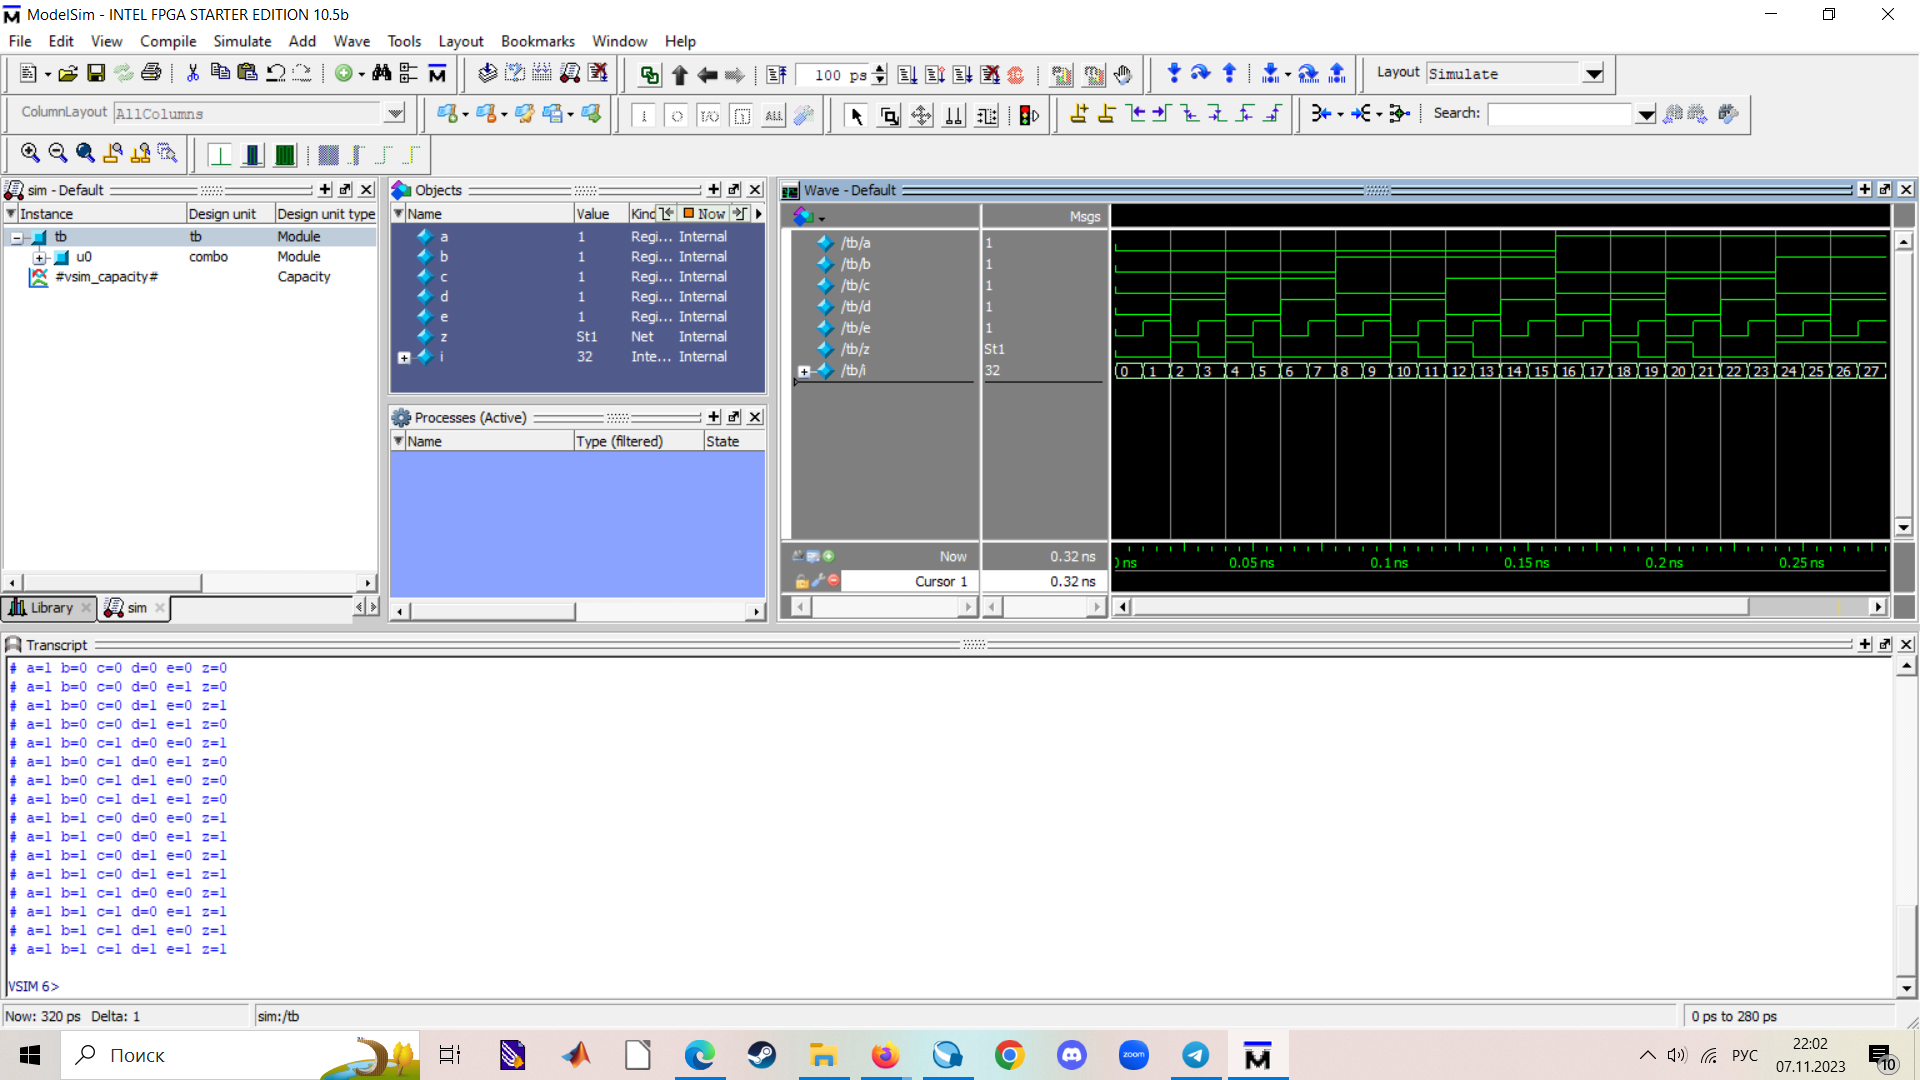

# Half Adder
Код halfadd.v:

```
module halfadd ( input a, b, output reg sum, cout);
	always @ (a or b) begin
		{cout, sum} = a + b;
	end
endmodule
```
Код testbench halfadd_tb.v:

```
module tb;
	reg a, b;
	wire sum, cout;
	integer i;
	halfadd u0 ( .a(a), .b(b), .sum(sum), .cout(cout));
	initial begin
		a <= 0;
		b <= 0;
		$monitor("a=%0b b=%0b sum=%0b cout=%0b", a, b, sum, cout);
		for (i = 0; i < 4; i = i + 1) begin
			{a, b} = i;
			#10;
		end
	end
endmodule
```
Схема:



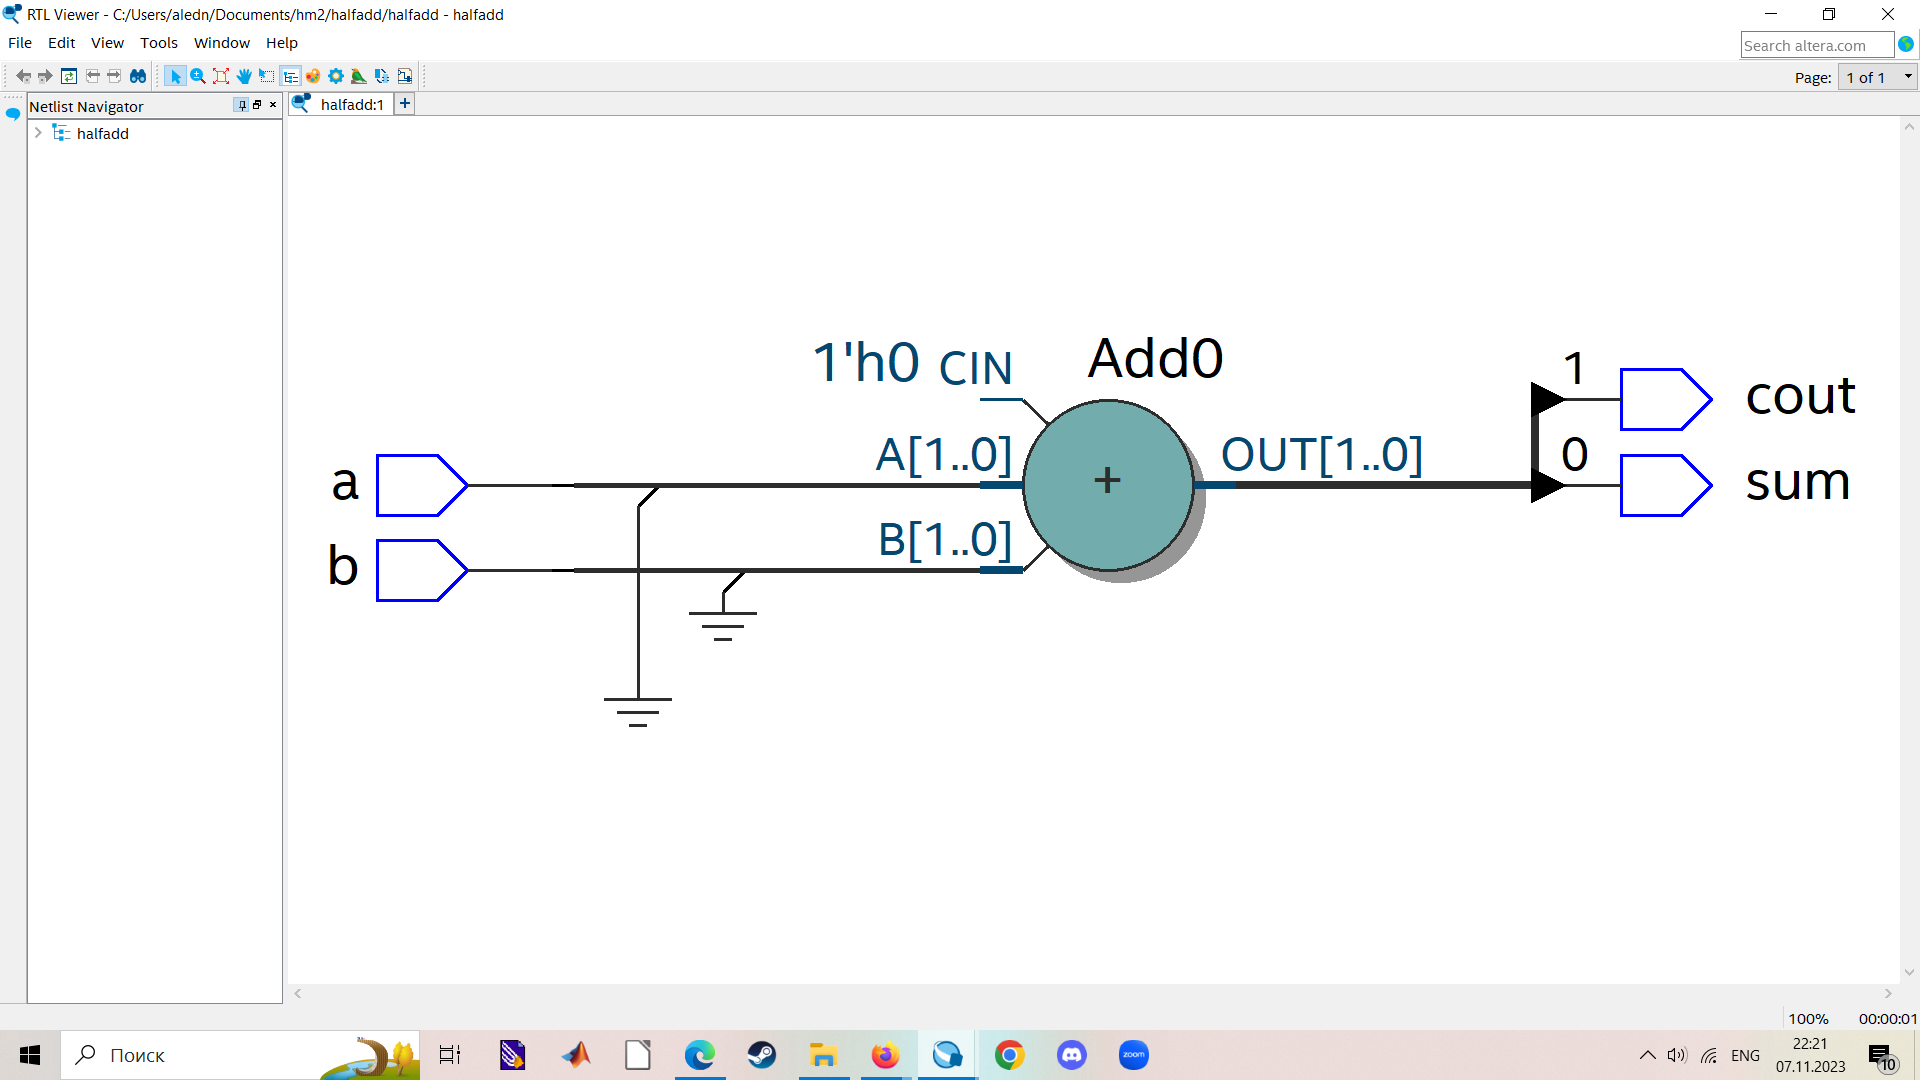

Результаты симуляции:

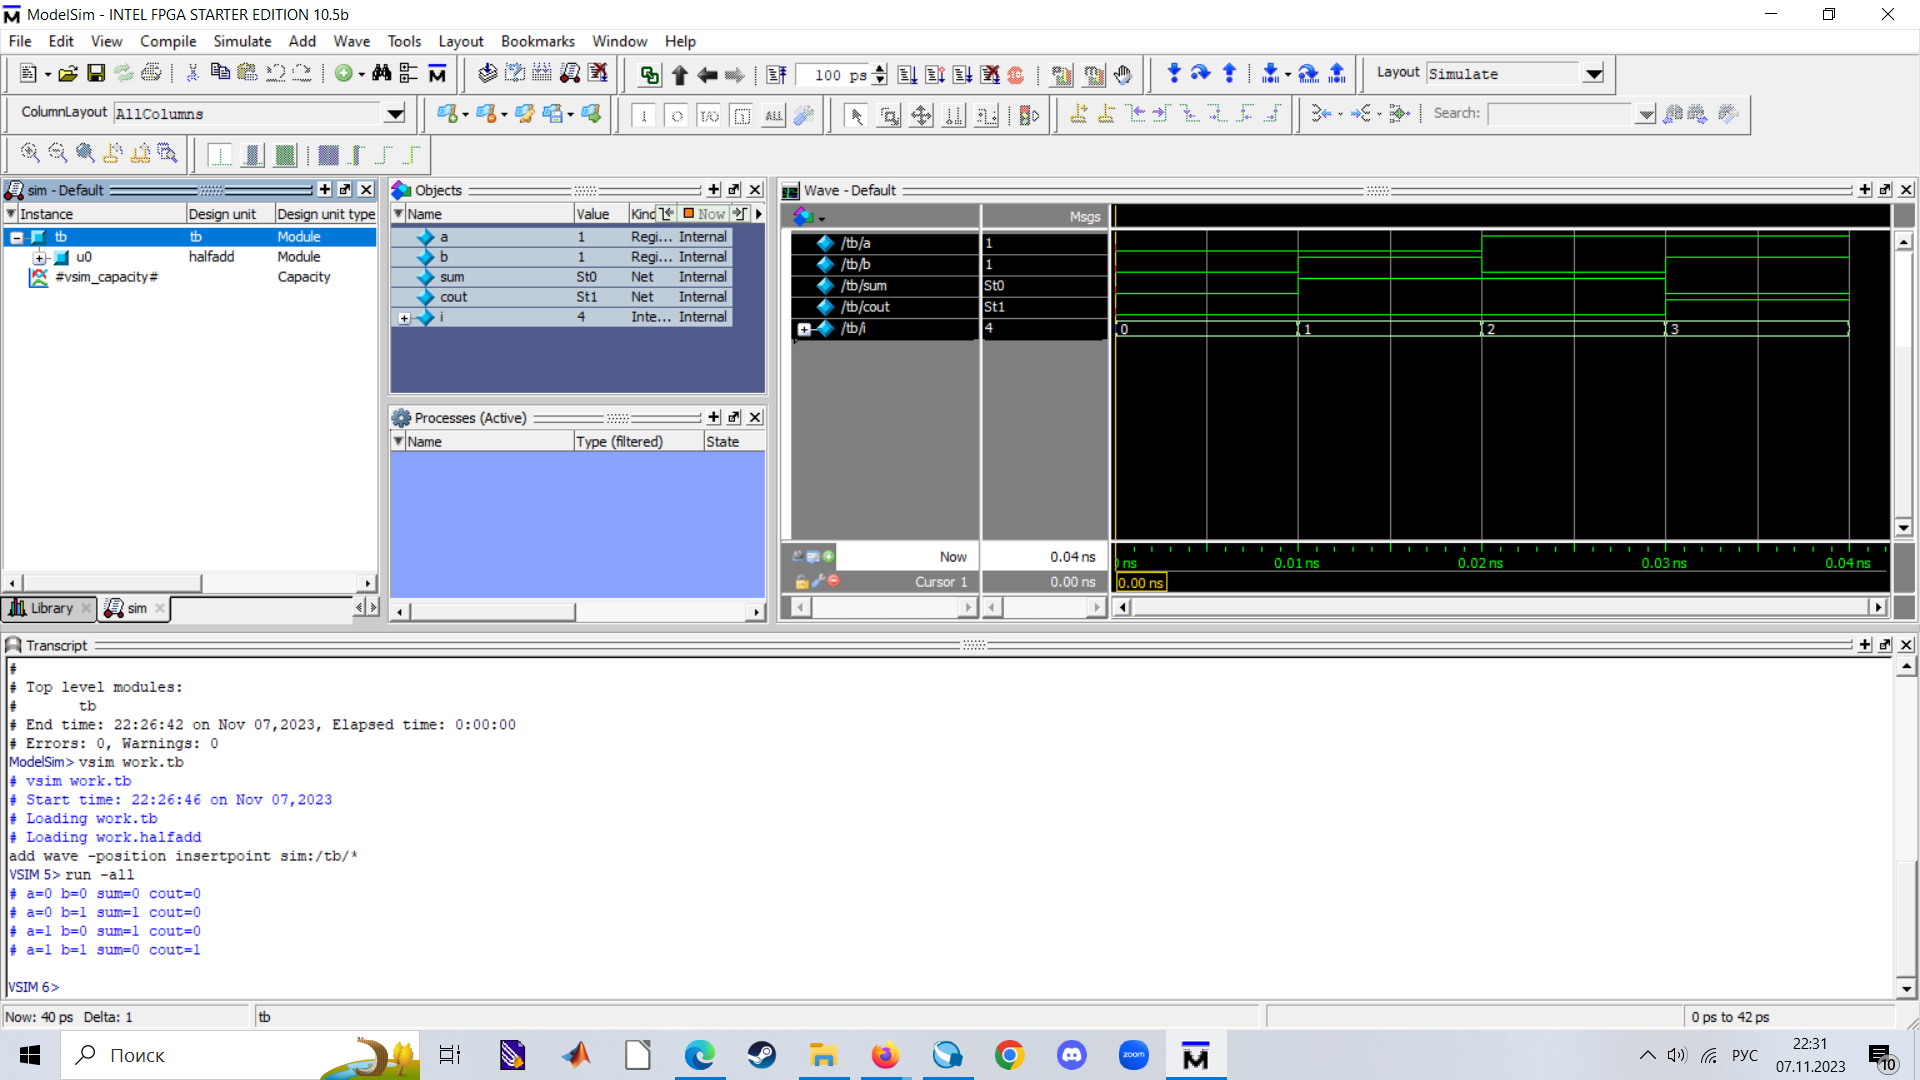

P.S. В коде halfadd.v с сайта было "module halfadd ( input a, b, output sum, cout);", в результате появлялись ошибки синтеза вида: "Error (10137): Verilog HDL Procedural Assignment error at halfadd.v(3): object "cout" on left-hand side of assignment must have a variable data type". Поэтому эта строчка была заменена на "module halfadd ( input a, b, output reg sum, cout);", и ошибки исчезли.

# Full Adder
Код fulladd.v:
```
module fulladd ( input a, b, cin, output reg sum, cout);
	always @ (a or b or cin) begin
		{cout, sum} = a + b + cin;
	end
endmodule
```
Код testbench fulladd_tb.v:
```
module tb;
	reg a, b, cin;
	wire sum, cout;
	integer i;
	fulladd u0 ( .a(a), .b(b), .cin(cin), .sum(sum), .cout(cout));
	initial begin
		a <= 0;
		b <= 0;
		$monitor("a=%0b b=%0b cin=%0b cout=%0b sum=%0b", a, b, cin, cout, sum);
		for (i = 0; i < 8; i = i + 1) begin
			{a, b, cin} = i;
			#10;
		end
	end
endmodule
```
Схема:

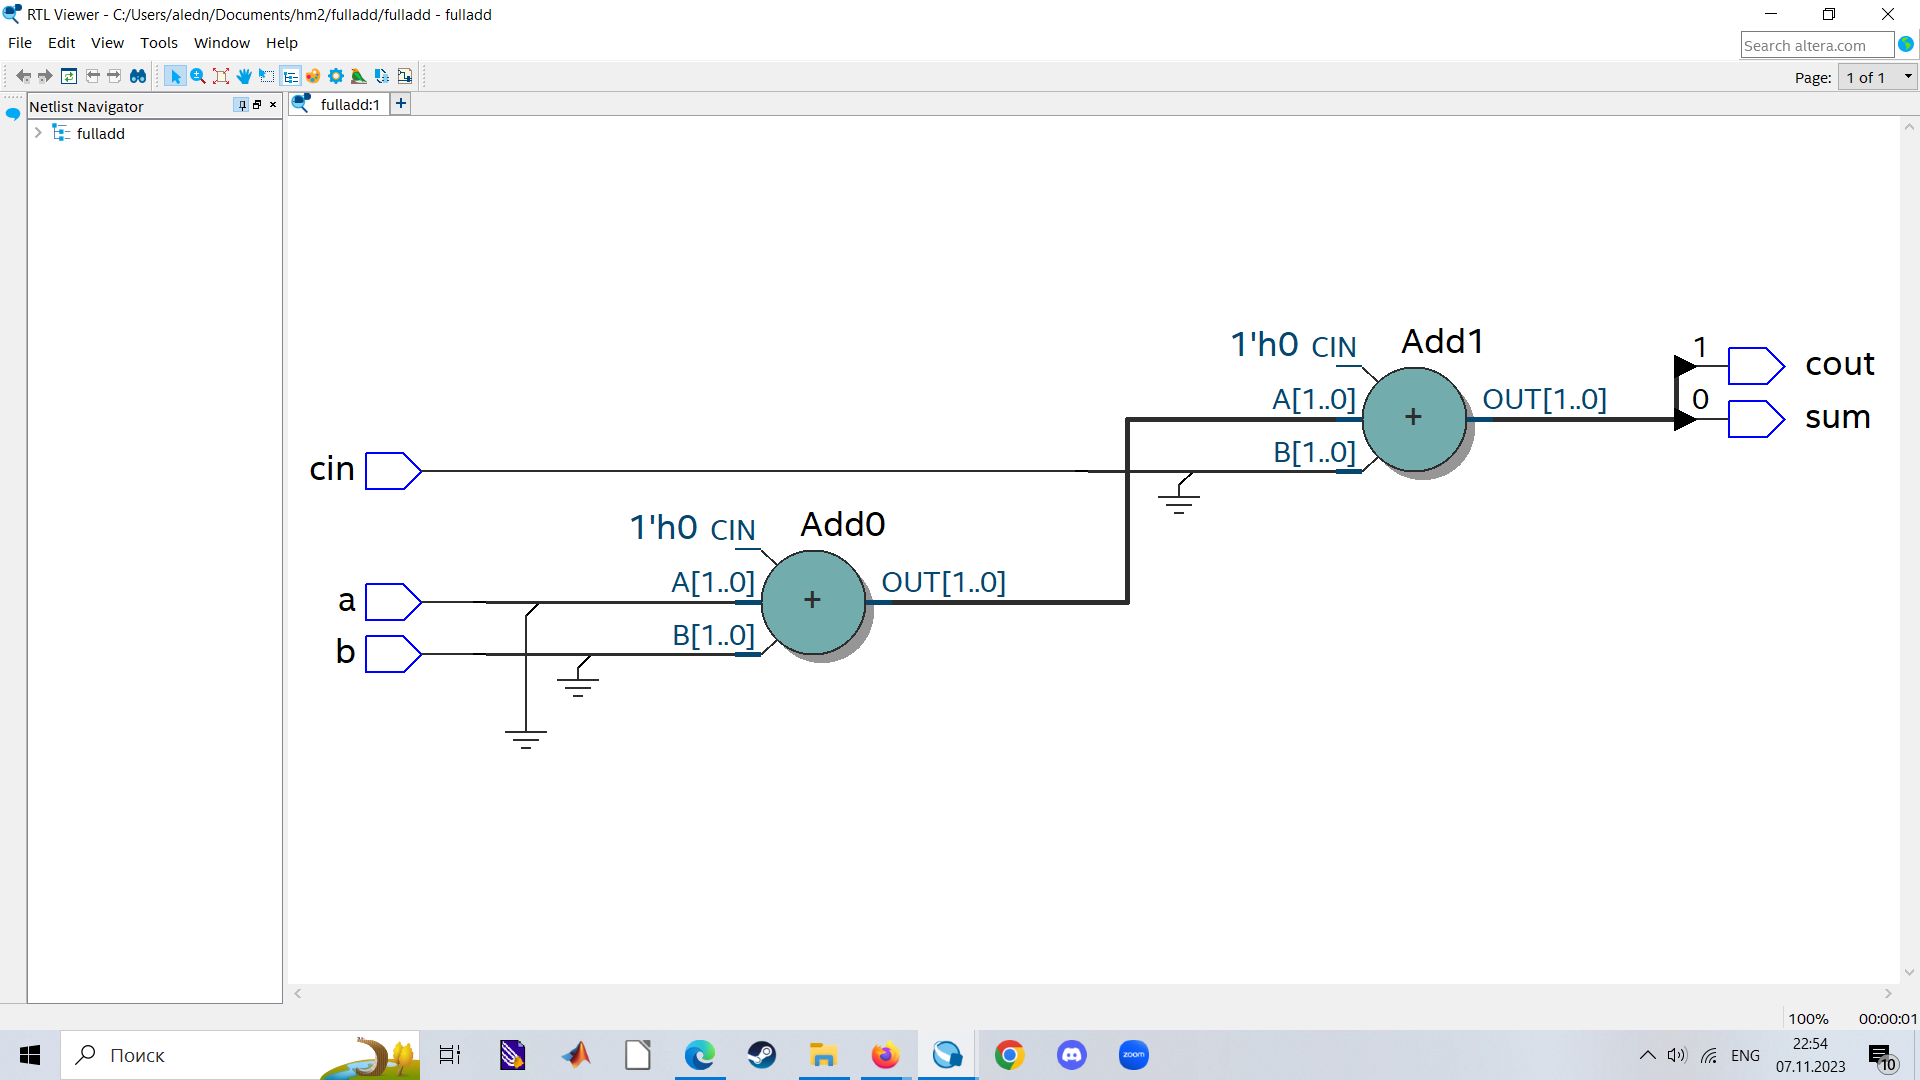

Результаты симуляции:

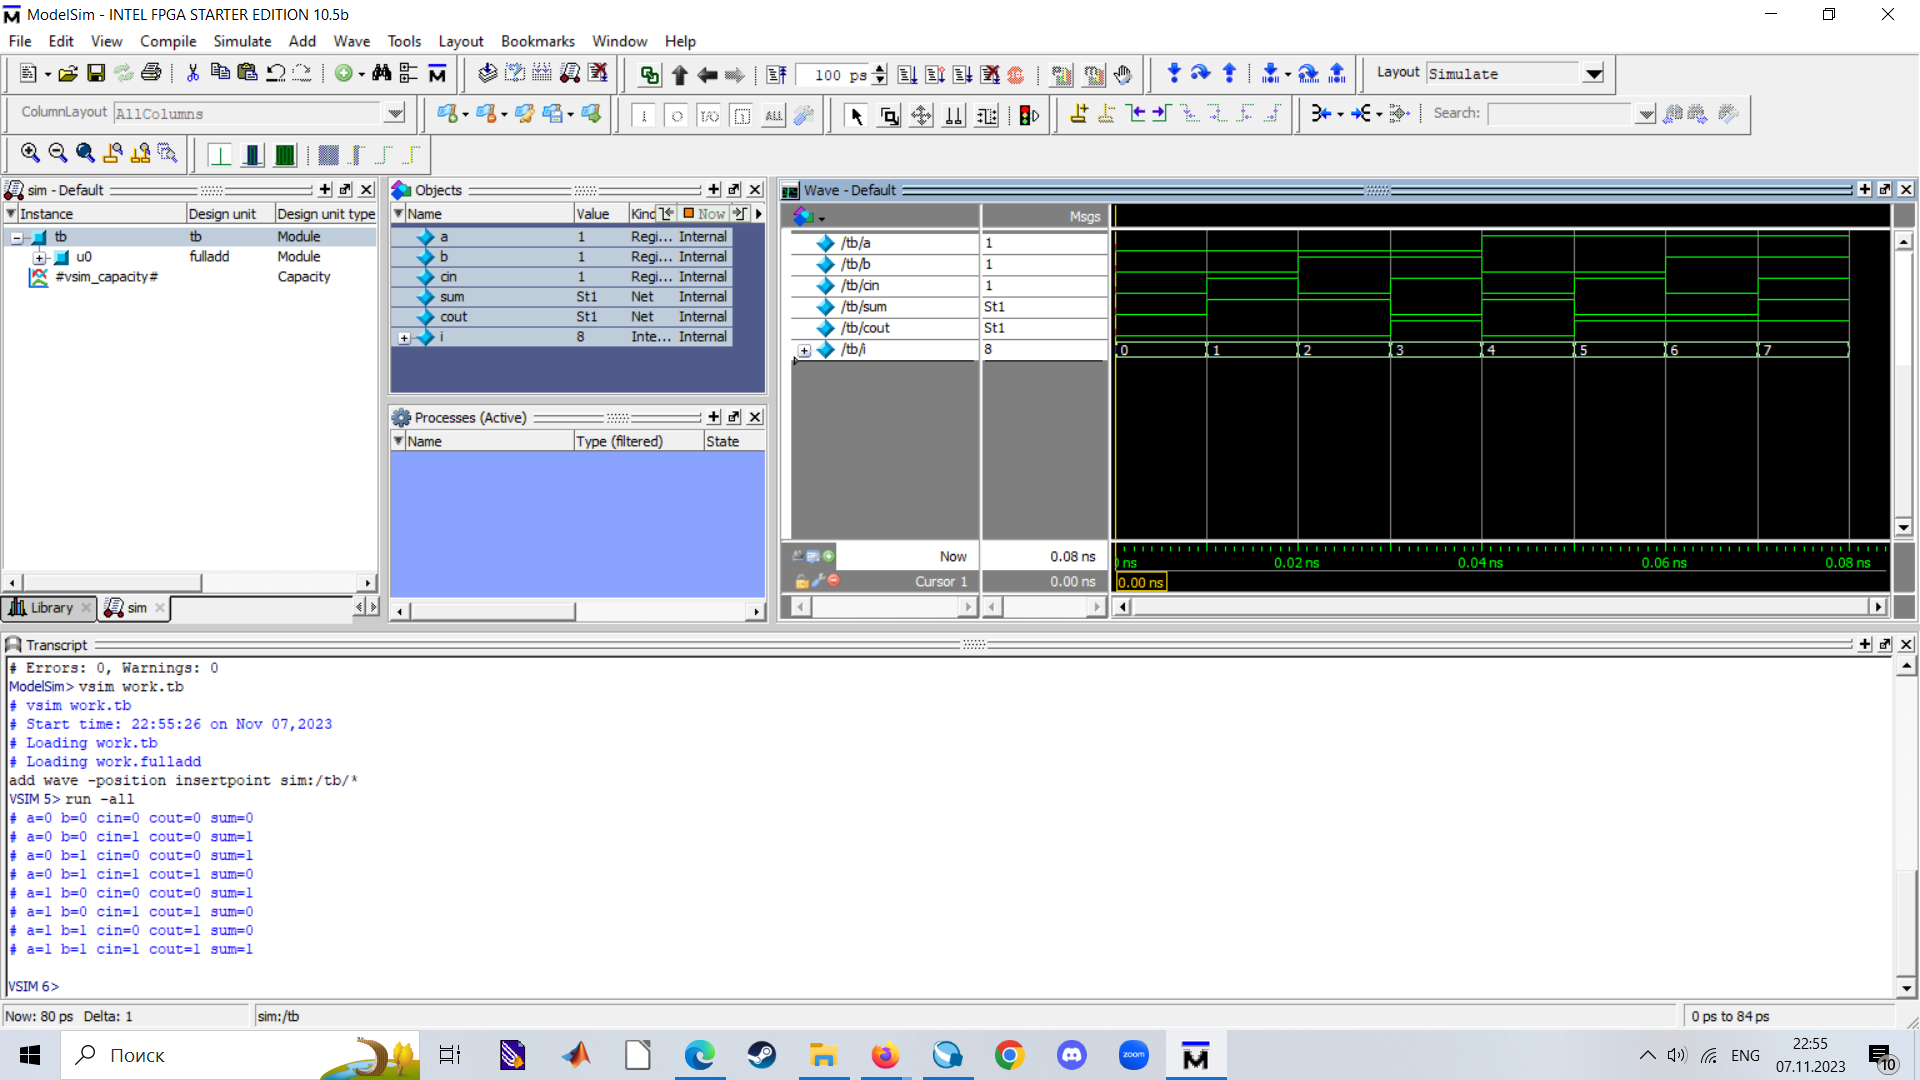

# 2x1 Multiplexer
Код mux21.v:
```
module mux21 (input a, b, sel, output reg c);
	always @ ( a or b or sel) begin
		c = sel ? a : b;
	end
endmodule
```
Код testbench mux21_tb.v:
```
module tb;
	reg a, b, sel;
	wire c;
	integer i;
	mux21 u0 ( .a(a), .b(b), .sel(sel), .c(c));
	initial begin
		a <= 0;
		b <= 0;
		sel <= 0;
		$monitor("a=%0b b=%0b sel=%0b c=%0b", a, b, sel, c);
		for (i = 0; i < 3; i = i + 1) begin
			{a, b, sel} = i;
		#10;
		end
	end
endmodule
```
Схема:


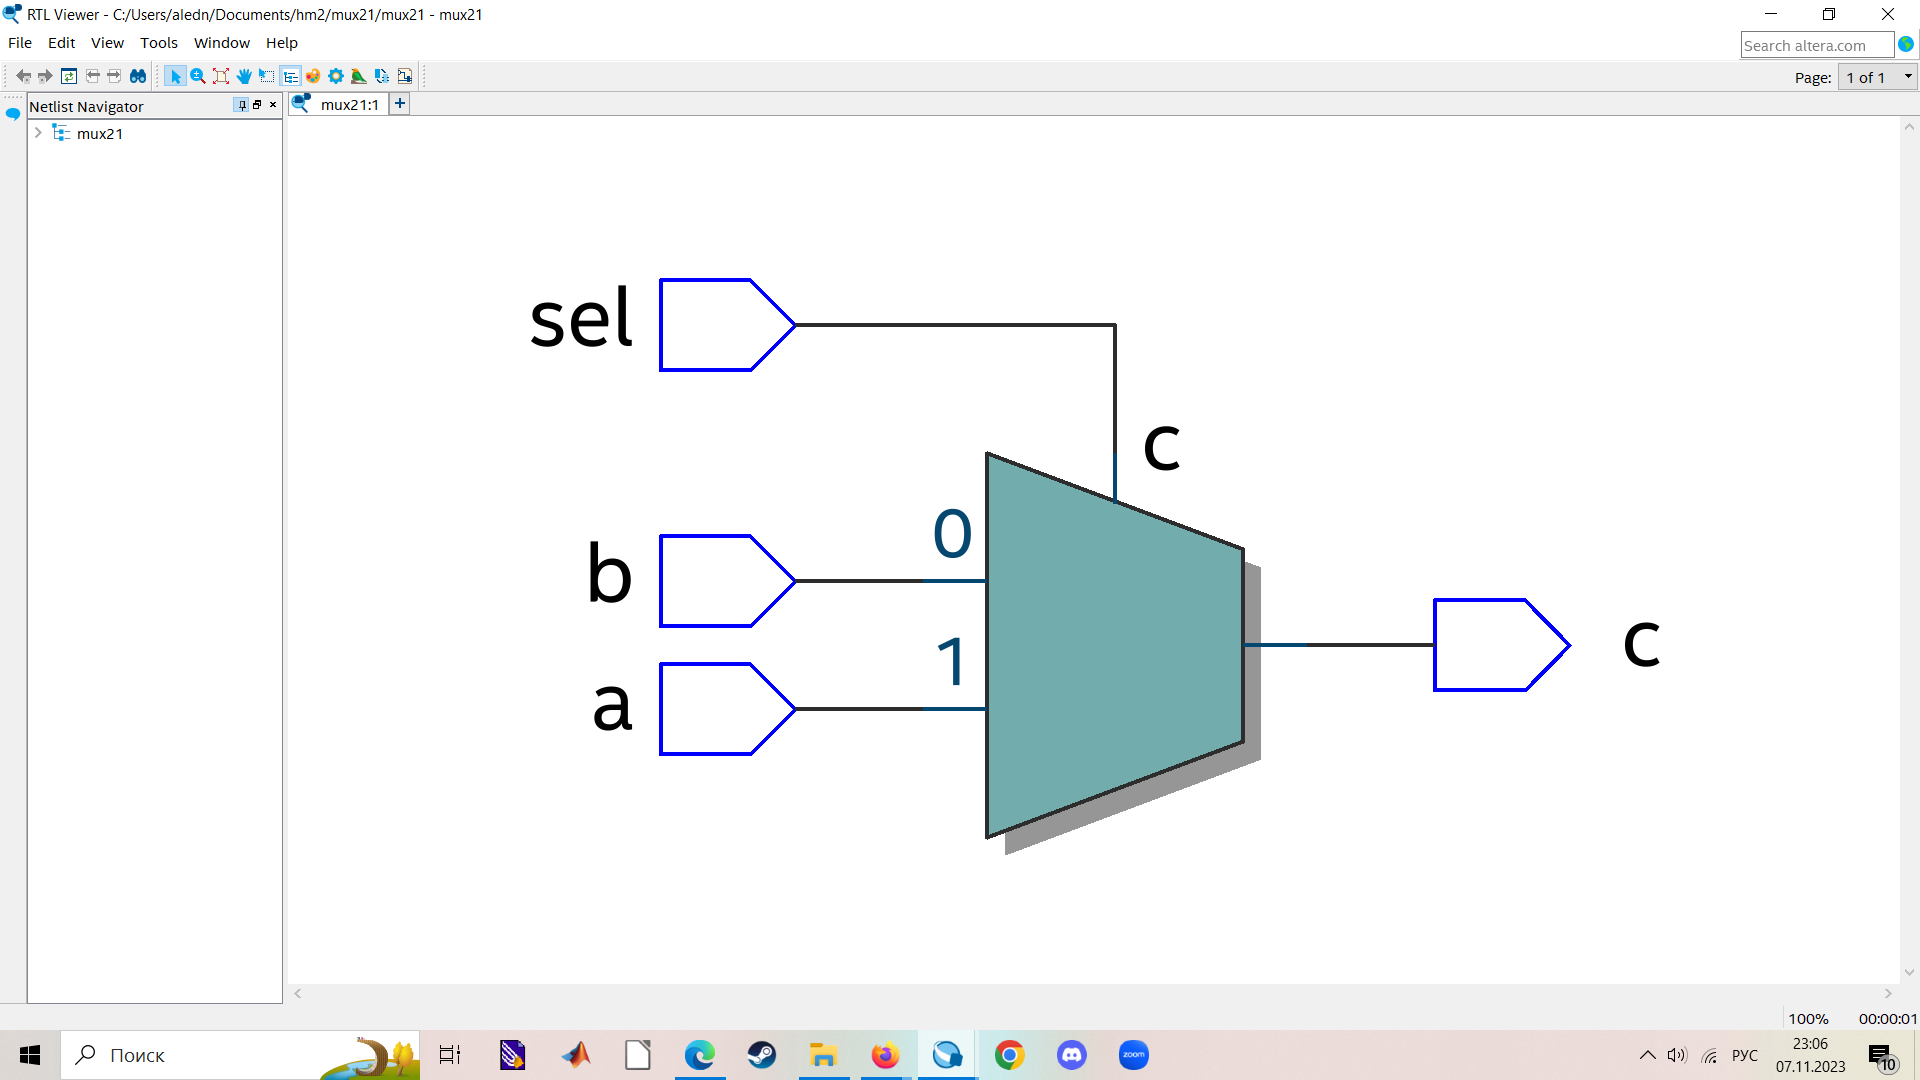

Результаты симуляции:

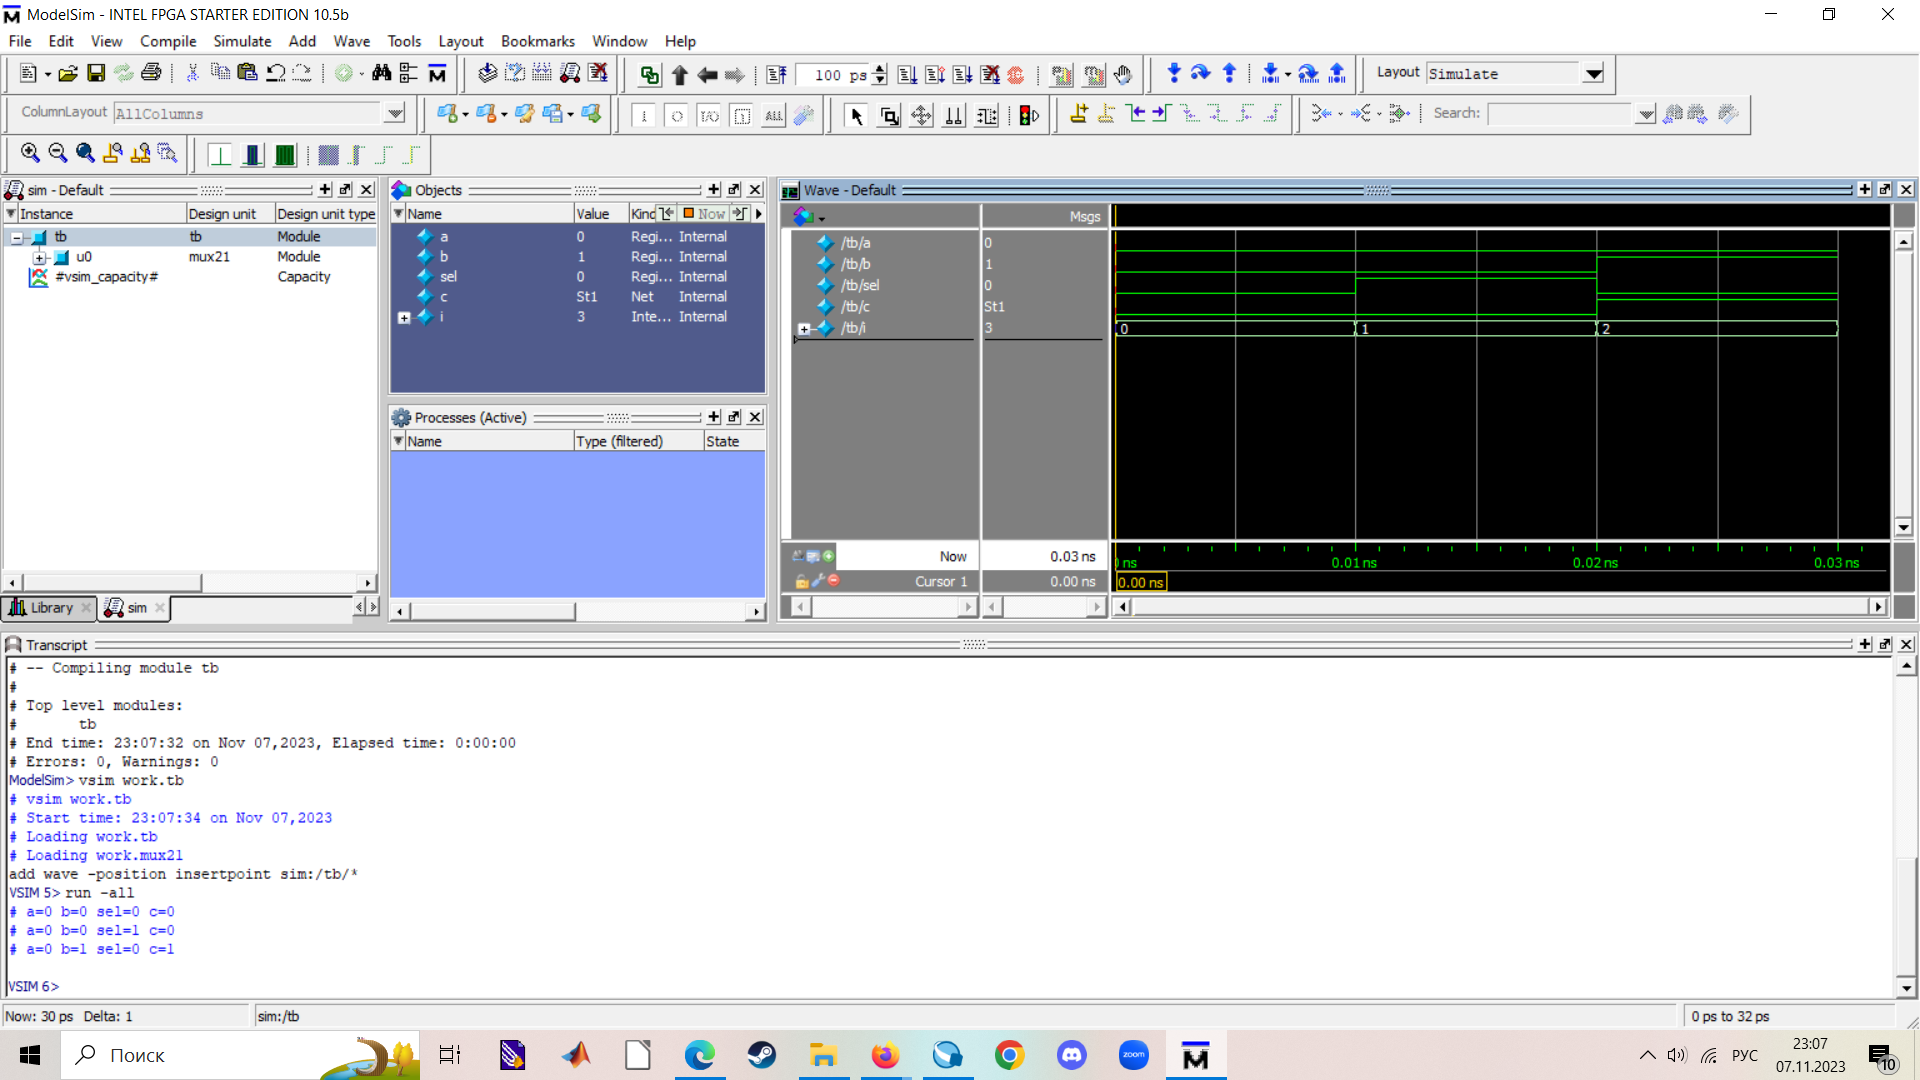

# 1x4 Demultiplexer
Код demux14.v:
```
module demux14 ( input f, input [1:0] sel, output reg a, b, c, d);
	always @ ( f or sel) begin
		a = f & ~sel[1] & ~sel[0];
		b = f & sel[1] & ~sel[0];
		c = f & ~sel[1] & sel[0];
		d = f & sel[1] & sel[0];
	end
endmodule
```
Код testbench demux14_tb.v:
```
module tb;
	reg f;
	reg [1:0] sel;
	wire a, b, c, d;
	integer i;
	demux14 u0 (.f(f), .sel(sel), .a(a), .b(b), .c(c), .d(d));
	initial begin
		f <= 0;
		sel <= 0;
		$monitor("f=%0b sel=%0b a=%0b b=%0b c=%0b d=%0b", f, sel, a, b, c, d);
		for (i = 0; i < 8; i = i + 1) begin
			{f, sel} = i;
			#10;
		end
	end
endmodule
```
Схема:


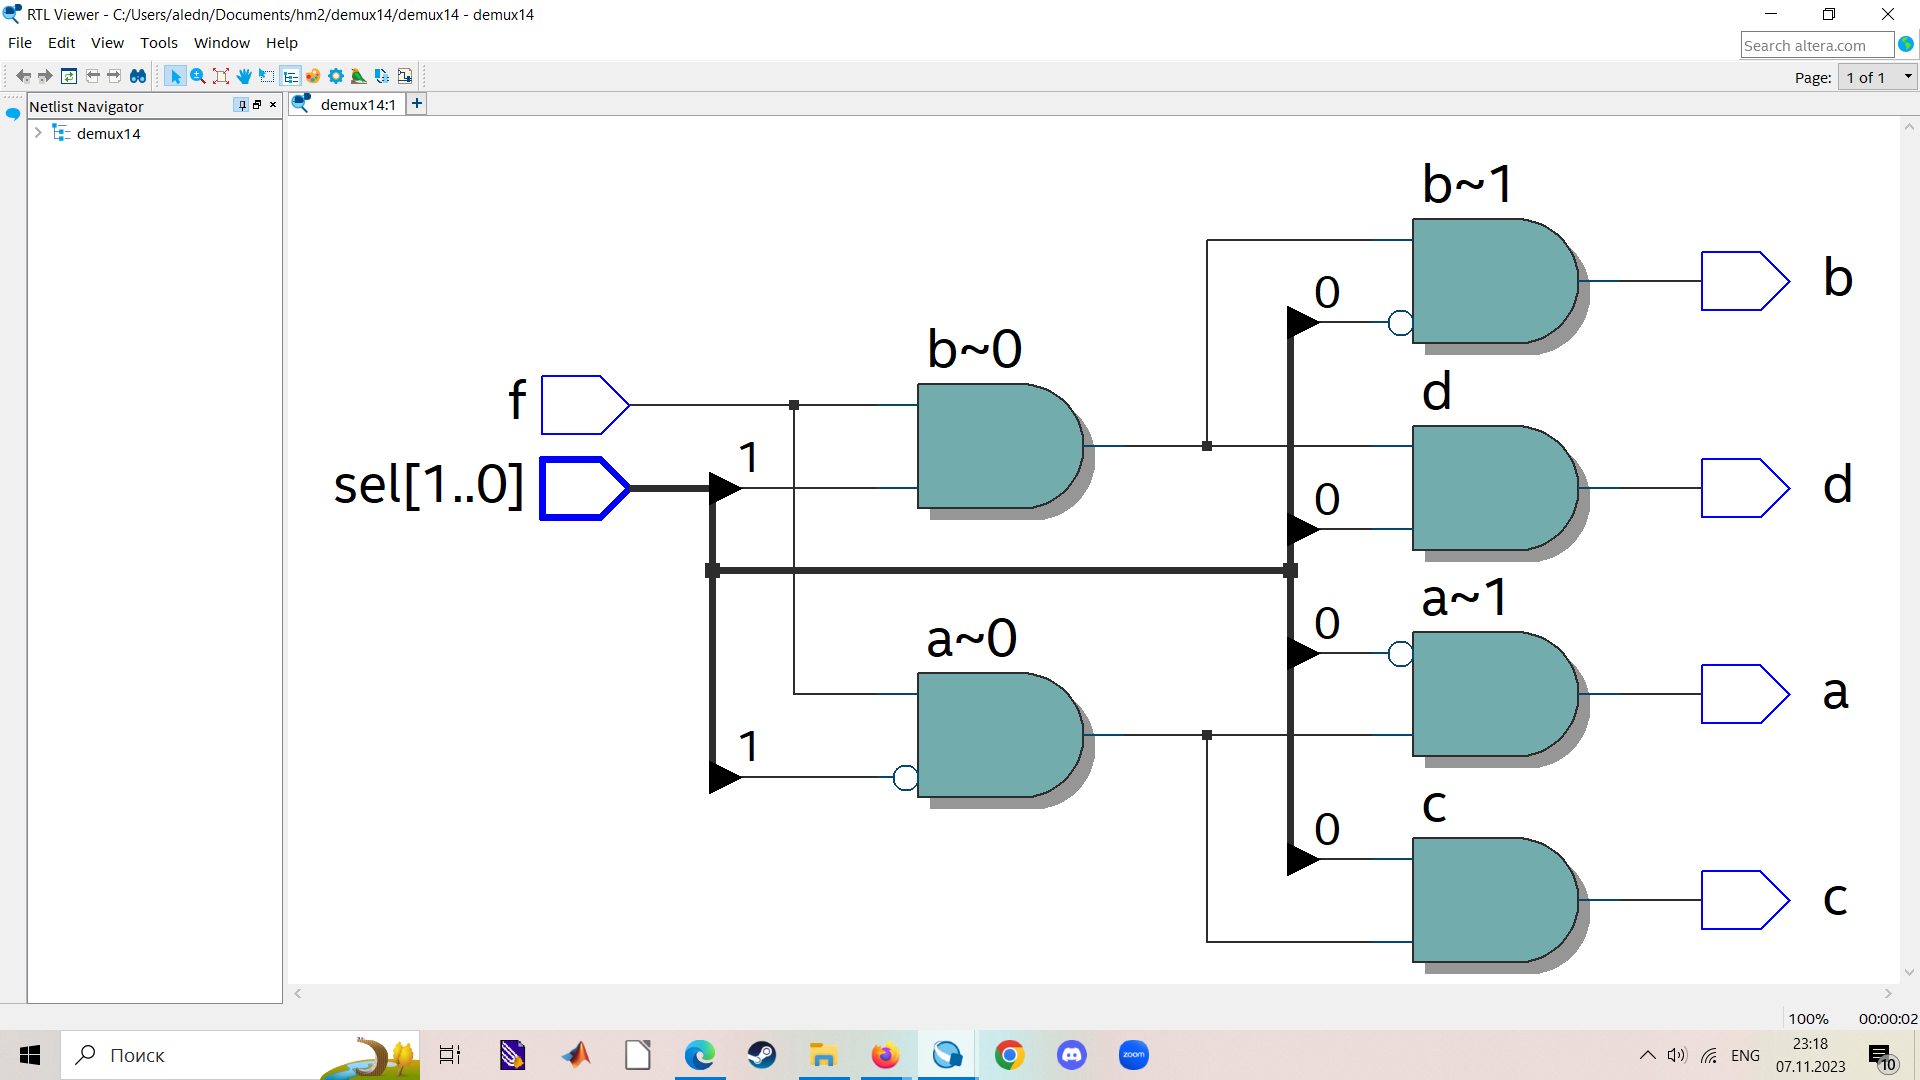

Результаты симуляции:

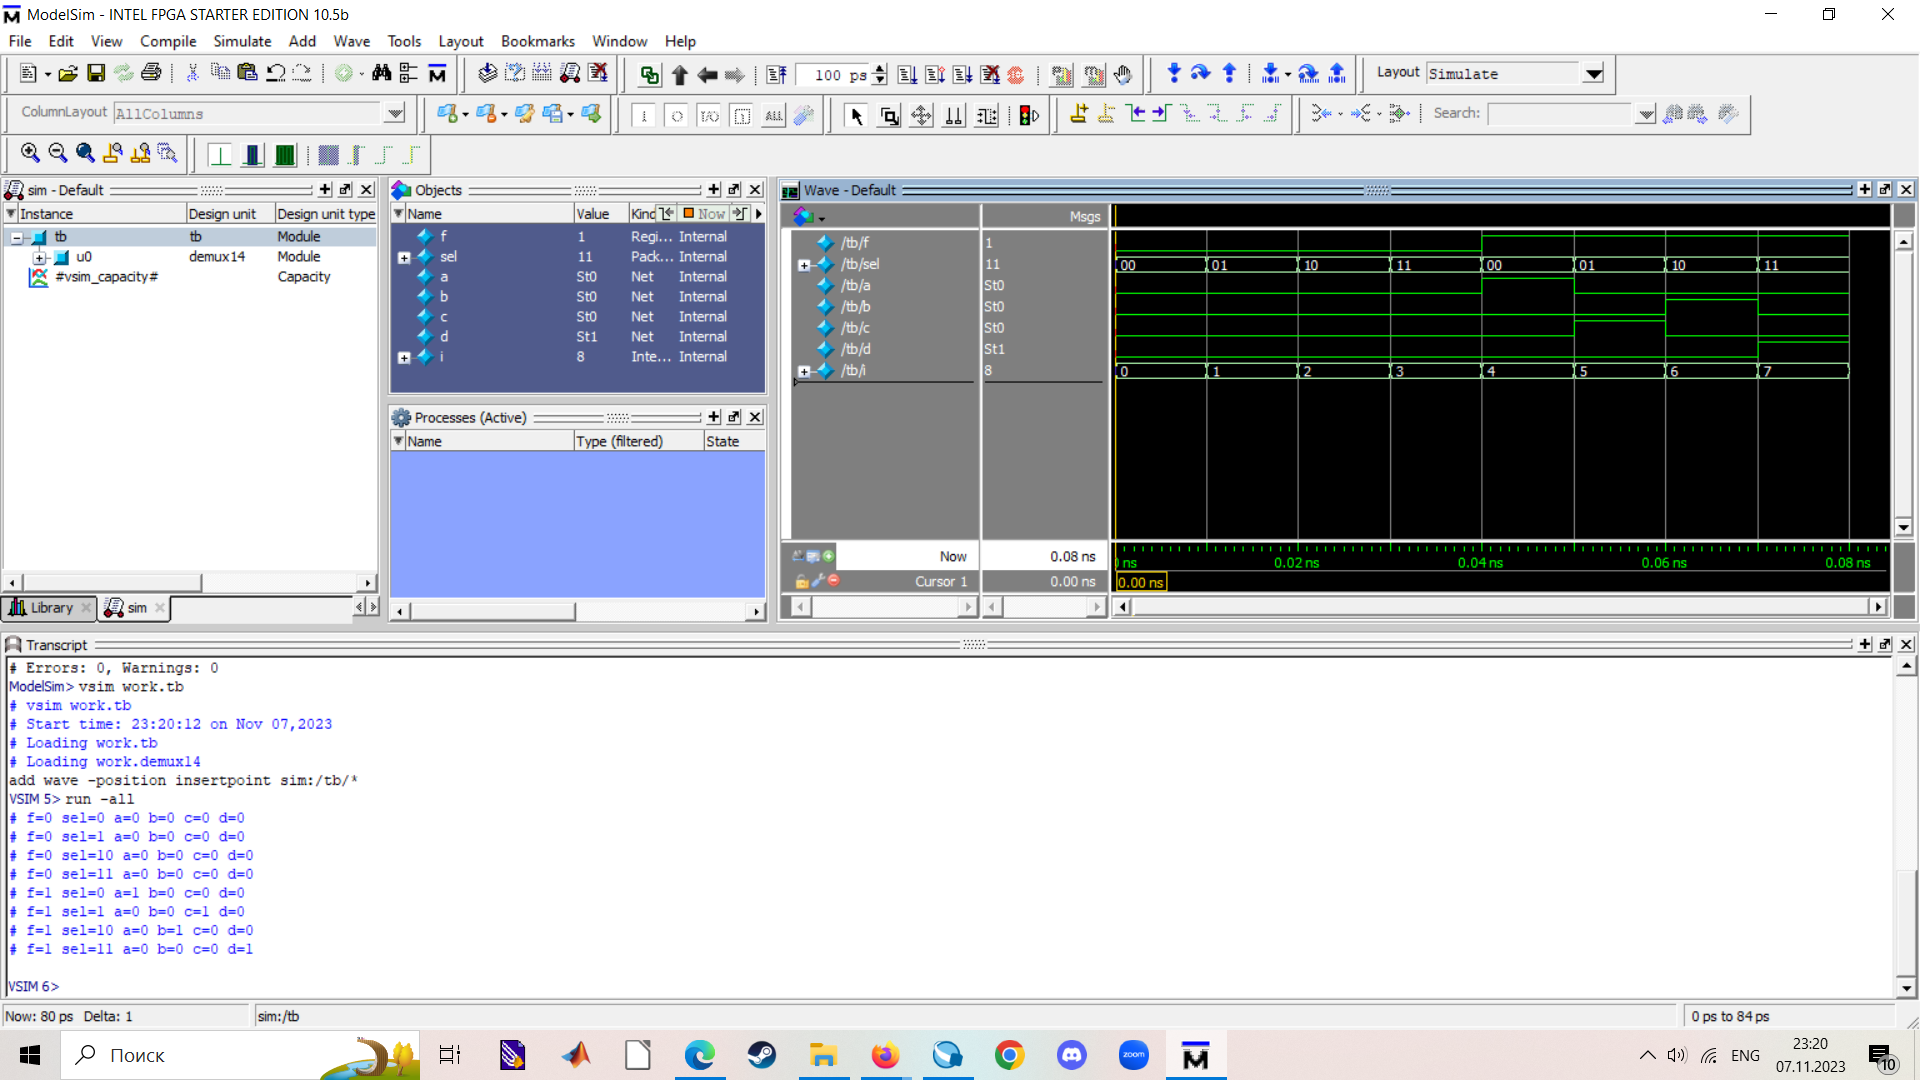

# 4x16 Decoder
Код decod_4x16.v:
```
module decod_4x16 ( input en, input [3:0] in, output reg [15:0] out);
	always @ (en or in) begin
		out = en ? 1 << in: 0;
	end
endmodule
```
Код testbench decod_4x16_tb.v:
```
module tb;
	reg en;
	reg [3:0] in;
	wire [15:0] out;
	integer i;
	decod_4x16 u0 ( .en(en), .in(in), .out(out));
	initial begin
		en <= 0;
		in <= 0;
		$monitor("en=%0b in=0x%0h out=0x%0h", en, in, out);
		for (i = 0; i < 32; i = i + 1) begin
			{en, in} = i;
			#10;
		end
	end
endmodule
```
Схема:


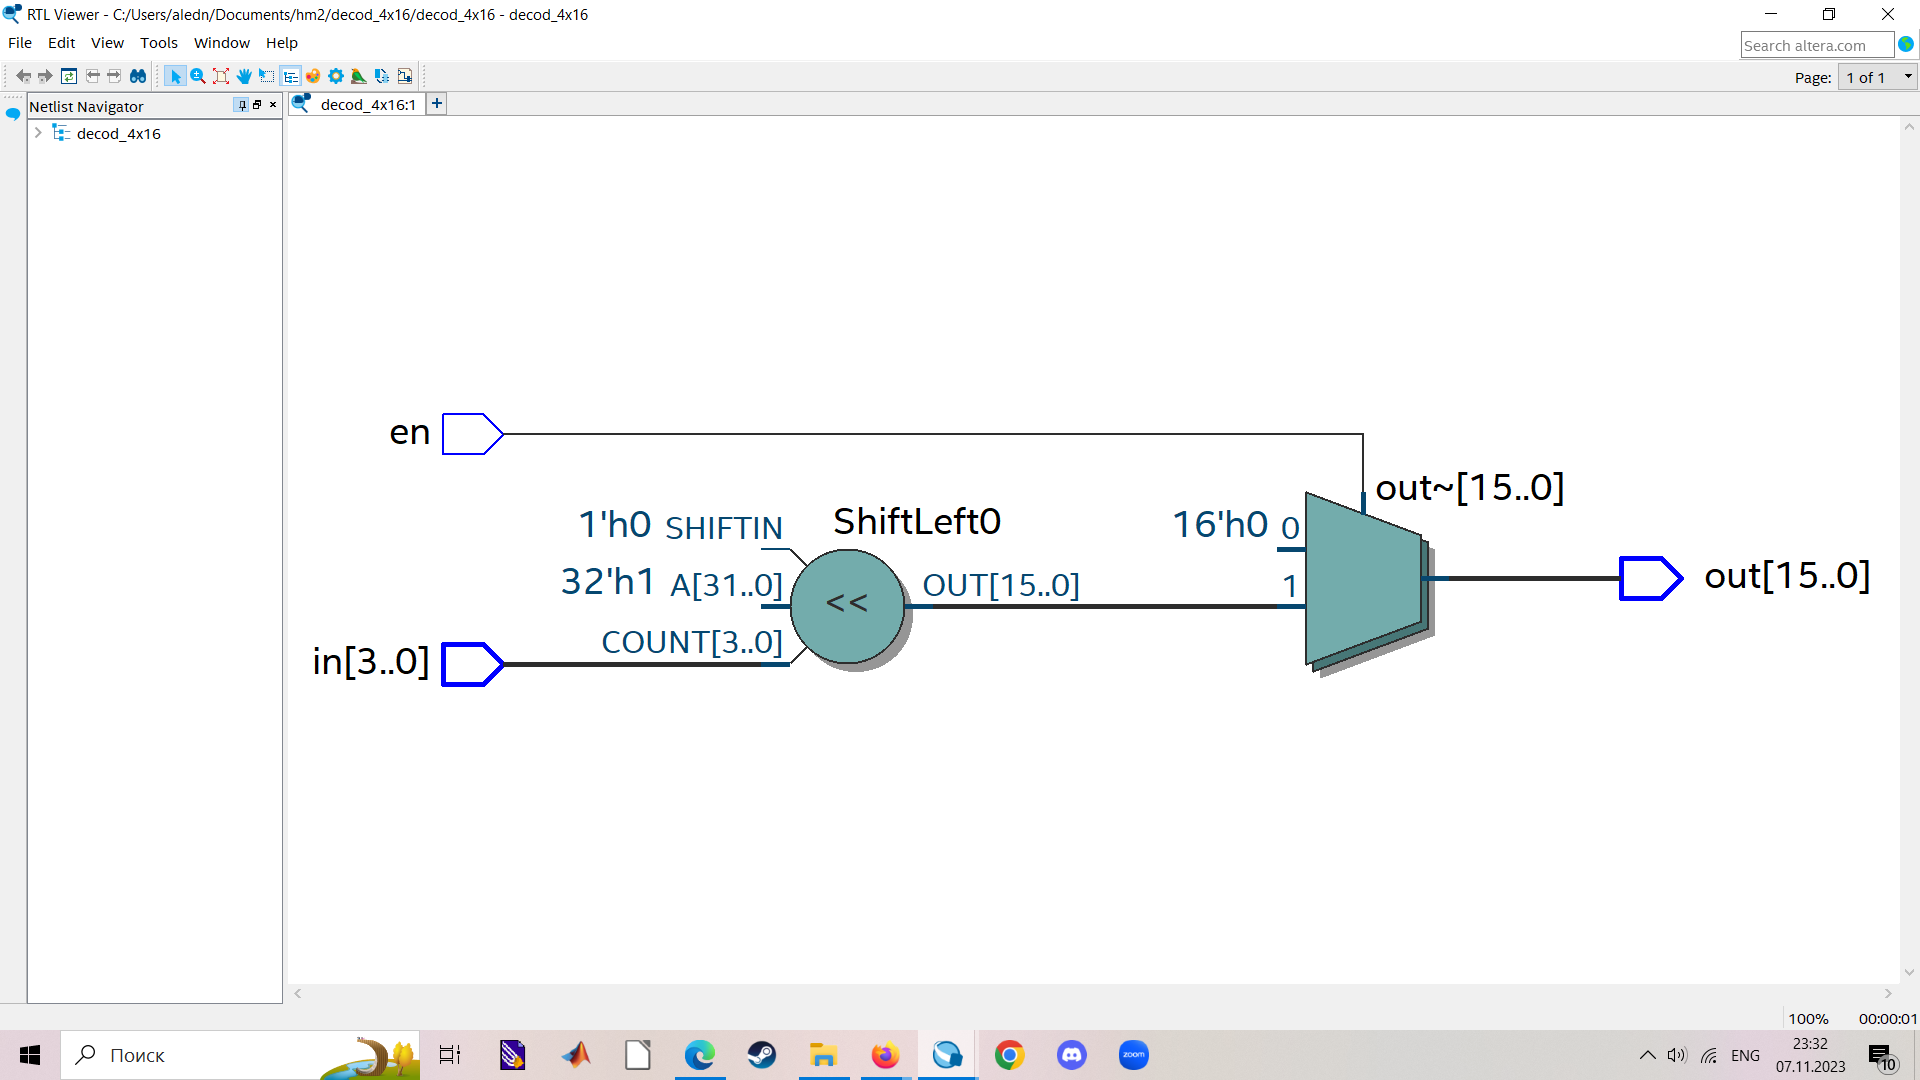

Результаты симуляции:

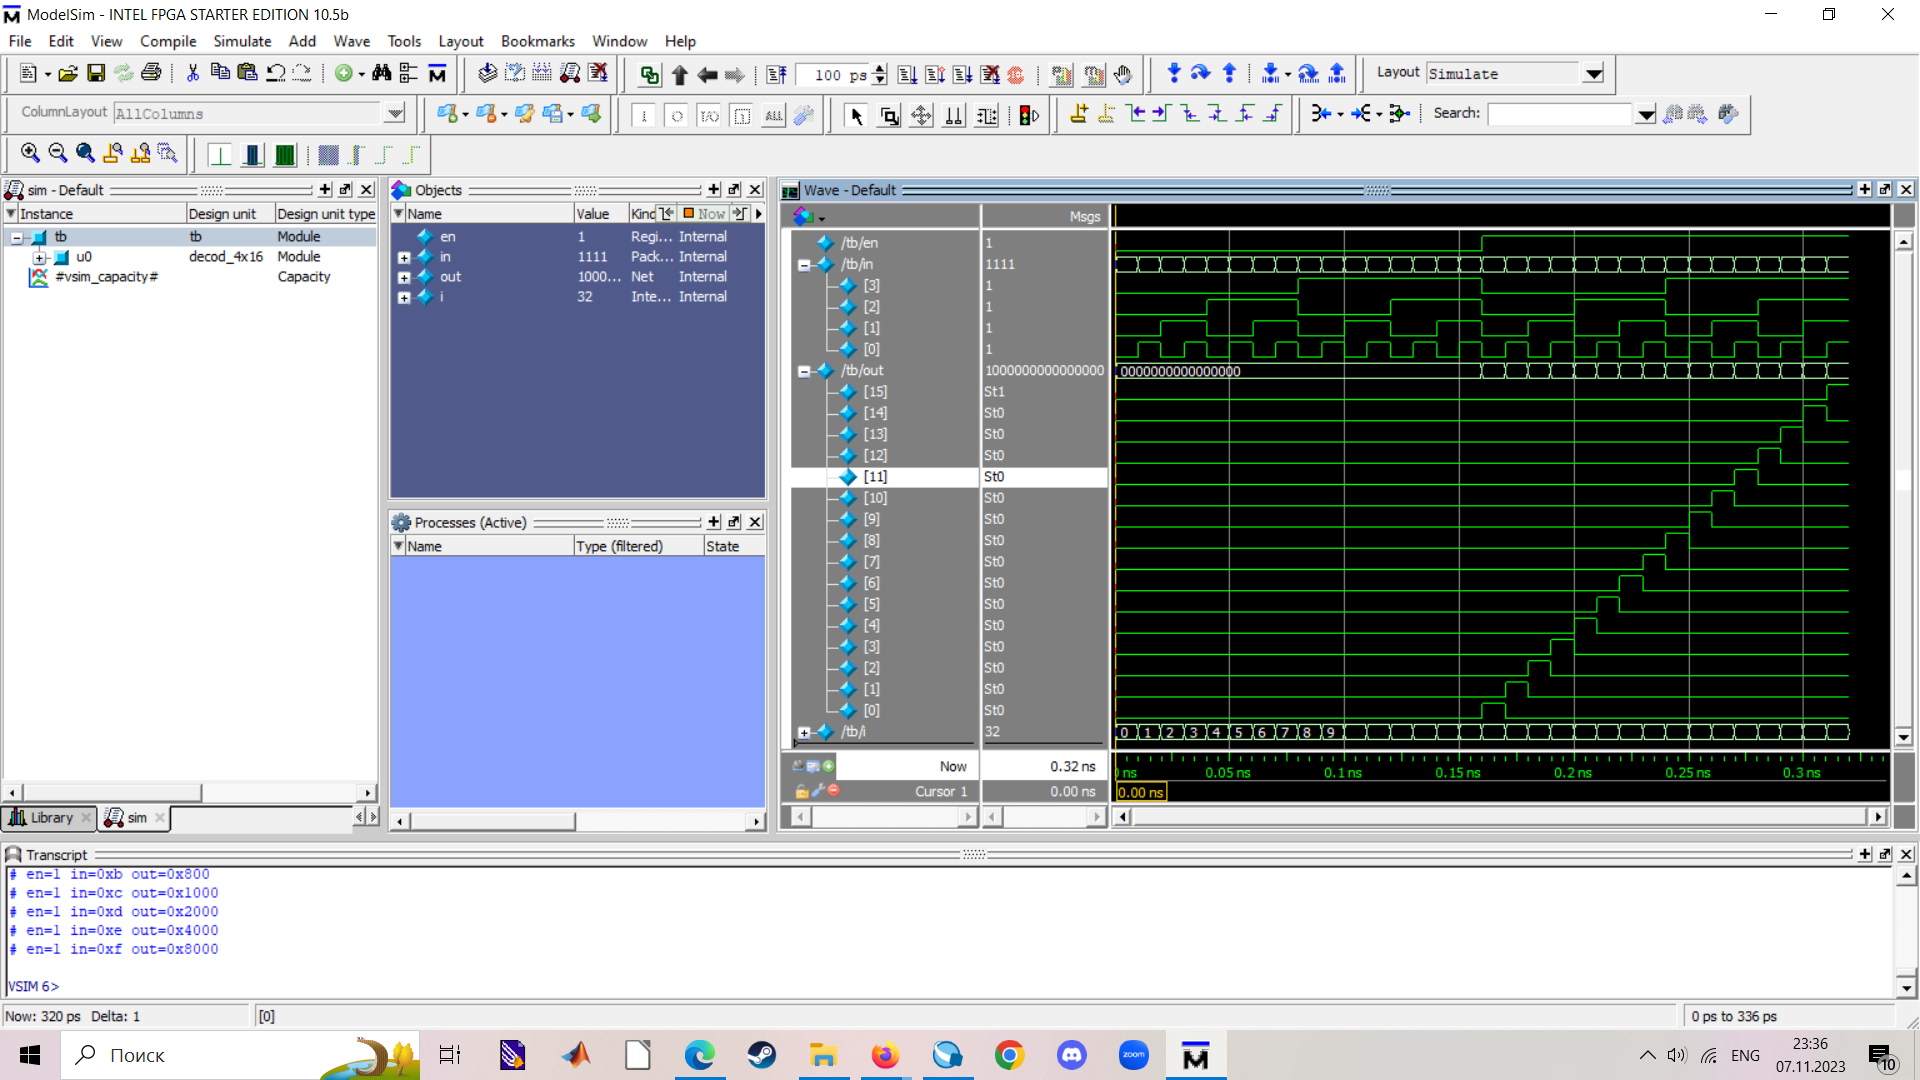

# Combinational Element Design Example
Код combo1.v:
```
module combo1 (input a,
					input b,
					input c,
					input d,
					output reg o);
	always @ (a or b or c or d) begin
		o <= ~((a & b) | (c^d));
	end
endmodule
```
Код combo1_tb.v:
```
module tb;
	reg a, b, c, d;
	wire o;
	integer i;
	combo1 u0 ( .a(a), .b(b), .c(c), .d(d), .o(o));
	initial begin
		a <= 0;
		b <= 0;
		c <= 0;
		d <= 0;
		$monitor ("a=%0b b=%0b c=%0b d=%0b o=%0b", a, b, c, d, o);
		for (i = 0; i < 16; i = i + 1) begin
			{a, b, c, d} = i;
			#10;
		end
	end
endmodule
```
Схема:

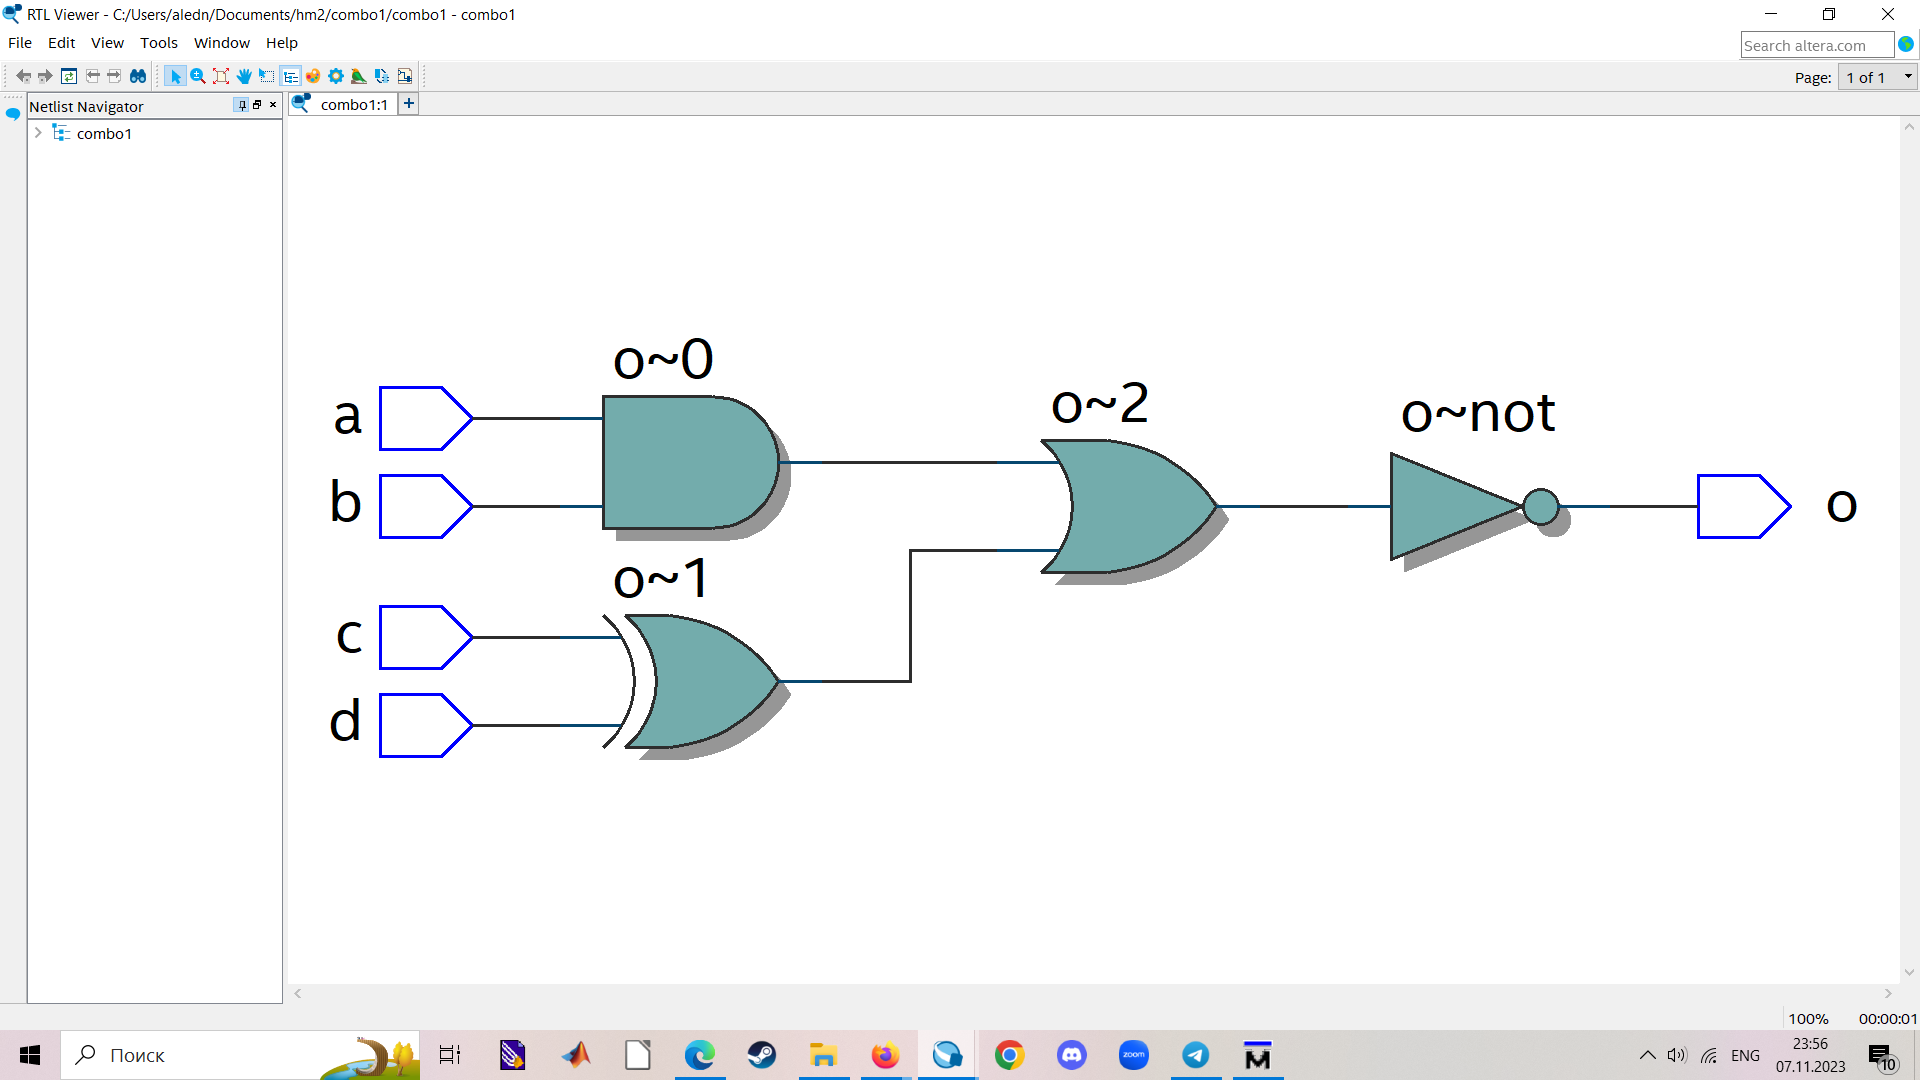

Результаты симуляции:

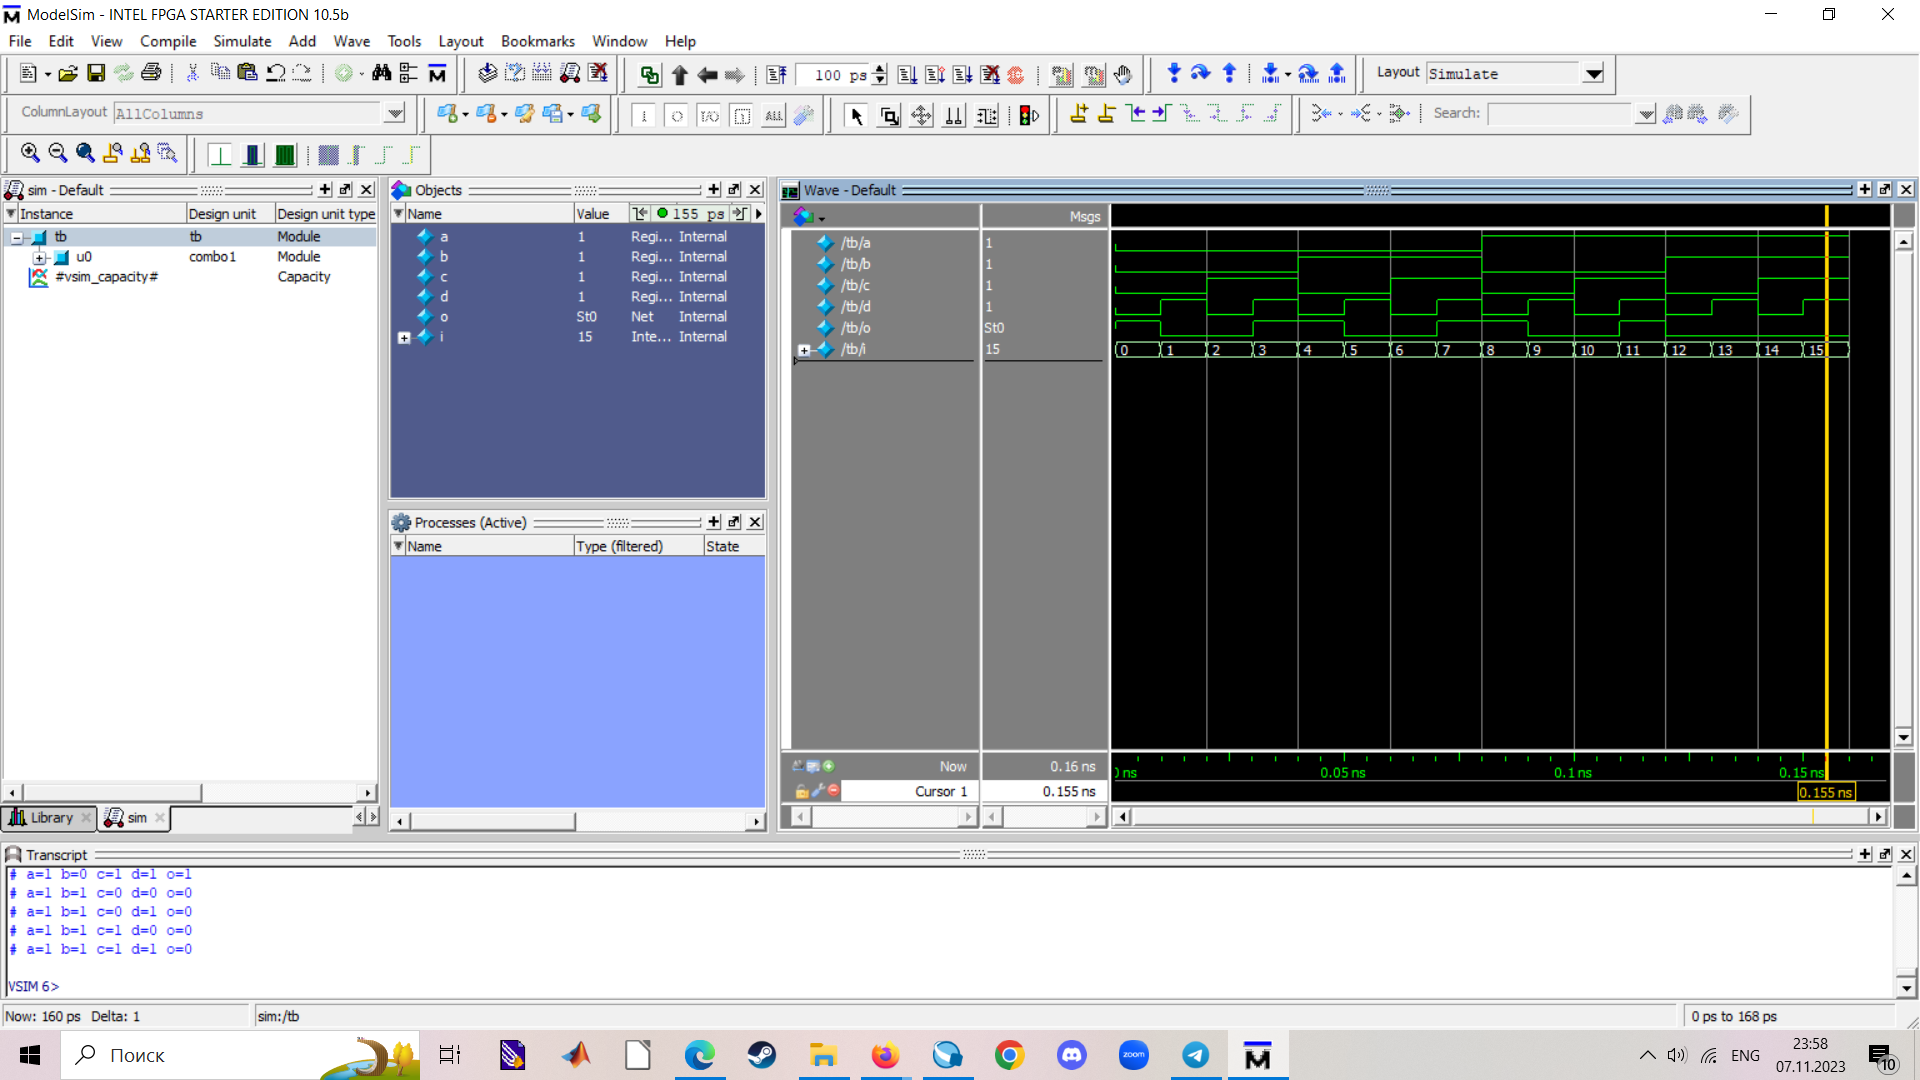